Video games are sold all over the world which produces a large amount of data on user and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales. The goal of this project is to identify patterns that determine whether a game succeeds or not. This will allow identification of potential big winners and which games to plan advertising campaigns for...

In [167]:
# Import packages needed for analysis of data
import pandas as pd
import plotly.express as px
import re
from matplotlib import pyplot as plt 
import numpy as np 
from scipy import stats 
import seaborn as sns

In [168]:
# Print info of DataFrame to get all attributes of table at once
DF = pd.read_csv("dataset.csv")
print(DF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


In [169]:
# Rename column names to contain only lowercase letters
DF = DF.rename(
    columns={
        'Name': 'name',
        'Platform': 'platform',
        'Year_of_Release': 'year_of_release',
        'Genre': 'genre',
        'NA_sales': 'na_sales',
        'EU_sales': 'eu_sales',
        'JP_sales': 'jp_sales',
        'Other_sales': 'other_sales',
        'Critic_Score': 'critic_score',
        'User_Score': 'user_score',
        'Rating': 'rating'
    }
)

# Verify the change
print(DF.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


In [170]:
# Change the 'user_score' column from object to float to be able to conduct mathematical equations (ex: mean score, min score, max score, std score)
DF['user_score'] = pd.to_numeric(DF['user_score'], errors='coerce')

# Verify the change
print(DF.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB
None


I changed the user_score column from an object data type to a float, this will be more beneficial to later analysis in terms of finding means, medians, std; we won't be able to do statistical analysis on object data types. This also helped decrease non-null values from 10,014 to 7,590.

In [171]:
# Due to such a large dataset, it is not practical to display all the rows, thus we will print the first and last 5 rows.
# Print the first 5 rows for a small sample of data to give a quick snapshot of the structure of the dataset.
print(DF.head(5))

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  
0     28.96      3.77         8.45          76.0         8.0      E  
1      3.58      6.81         0.77           NaN         NaN    NaN  
2     12.76      3.79         3.29          82.0         8.3      E  
3     10.93      3.28         2.95          80.0         8.0      E  
4      8.89     10.22         1.00           NaN         NaN    NaN  


In [172]:
# Print last 5 rows for another sample of data to check if there are any special cases, outliers, or null values that weren't visible at the beginning.
print(DF.tail(5))

                                name platform  year_of_release       genre  \
16710  Samurai Warriors: Sanada Maru      PS3           2016.0      Action   
16711               LMA Manager 2007     X360           2006.0      Sports   
16712        Haitaka no Psychedelica      PSV           2016.0   Adventure   
16713               Spirits & Spells      GBA           2003.0    Platform   
16714            Winning Post 8 2016      PSV           2016.0  Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
16710      0.00      0.00      0.01          0.0           NaN         NaN   
16711      0.00      0.01      0.00          0.0           NaN         NaN   
16712      0.00      0.00      0.01          0.0           NaN         NaN   
16713      0.01      0.00      0.00          0.0           NaN         NaN   
16714      0.00      0.00      0.01          0.0           NaN         NaN   

      rating  
16710    NaN  
16711    NaN  
16712    NaN  
16

In [173]:
# Check for any duplicates
print(DF.duplicated().sum())

0


In [174]:
# Find the total of missing values for each column
print(DF.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64


In [175]:
# Find the % of missing values
missing_counts = DF.isna().sum()
missing_percent = (DF.isna().mean() * 100).round(2)

missing_summary = pd.DataFrame({
    'Missing_Count': missing_counts,
    'Missing_Percent': missing_percent
}).sort_values(by='Missing_Percent', ascending=False)


print(missing_summary)

                 Missing_Count  Missing_Percent
user_score                9125            54.59
critic_score              8578            51.32
rating                    6766            40.48
year_of_release            269             1.61
name                         2             0.01
genre                        2             0.01
platform                     0             0.00
na_sales                     0             0.00
eu_sales                     0             0.00
jp_sales                     0             0.00
other_sales                  0             0.00


The major categories missing data are critic_score, user_score, and rating. These variables appear because not all games receive a professional review or ESRB ratings. While these are high percentages of missingness, other core attributes such as platform, year, and global_sales are mostly complete, meaning the structural dataset is reliable for time-trend and platform-trend analyses.

I will not drop rows with missing scores for critic_score or user_score because that would remove a massive number of older or low-visibility games. Rather I will keep the columns and use them only where present.

For the rating column, many early-era games are missing these values. I will treat missing ratings as a separate category because it preserves all rows, the absence of a rating could possibly be informative itself, and it avoids biased imputations.

In [176]:
# Make sure there are no TBD values for any of the columns before starting to assess missing values individually

# Only work with string/object columns
str_cols = DF.select_dtypes(include='object').columns

# Build boolean mask of where 'TBD' appears
tbd_mask = DF[str_cols].apply(
    lambda s: s.str.strip().str.lower().eq('tbd')
)

# Count 'TBD' occurences per column
tbd_counts = tbd_mask.sum().sort_values(ascending=False)
print(tbd_counts[tbd_counts > 0])

Series([], dtype: int64)


In [177]:
# Replace 'TBD' with NaN in all string columns
DF[str_cols] = DF[str_cols].apply(
    lambda s: s.mask(s.str.strip().str.lower().eq('tbd'))
)

has_tbd = (DF[str_cols].apply(
    lambda s: s.str.strip().str.lower().eq('tbd')
)).any().any()

print("Any TBD in dataset?", has_tbd)

Any TBD in dataset? False


This shows that there are no rows with the value 'TBD'.

In [178]:
# Check to see if the missing values for the games with no names is significant enough to keep in the dataset
missing_specific_name = DF[DF['name'].isnull()]
print(missing_specific_name)

# Because there are sales for the games with no names, will not drop them from the data set so as to have a more accurate analysis later on
# The names could be missing, again, due to human error with information entry and source limitations if the data was collected from multiple platforms and databases

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score  user_score rating  
659           0.08           NaN         NaN    NaN  
14244         0.00           NaN         NaN    NaN  


In [179]:
# Will change NaN to N/A for the 2 games with no names to maintain consistency and good practice
DF['name'] = DF['name'].fillna('N/A')

# Verify the changes
print(DF.isnull().sum())

name                  0
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64


In [180]:
# Check to see if the year might be in the name of the game, if so we can use that information in a loop to place it in the year_of_release column
missing_specific_year= DF[DF['year_of_release'].isnull()]
print(missing_specific_year)

                                    name platform  year_of_release  \
183                      Madden NFL 2004      PS2              NaN   
377                     FIFA Soccer 2004      PS2              NaN   
456           LEGO Batman: The Videogame      Wii              NaN   
475           wwe Smackdown vs. Raw 2006      PS2              NaN   
609                       Space Invaders     2600              NaN   
...                                  ...      ...              ...   
16373  PDC World Championship Darts 2008      PSP              NaN   
16405                      Freaky Flyers       GC              NaN   
16448                          Inversion       PC              NaN   
16458        Hakuouki: Shinsengumi Kitan      PS3              NaN   
16522                       Virtua Quest       GC              NaN   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
183          Sports      4.26      0.26      0.01         0.71          94.0   

In [181]:
# We now know there are a few games that have the year in the game title

# Loop through each row to extract year and update the year_of_release column
for index, row in DF.iterrows():
    game_name = row['name']
    if isinstance(game_name, str):  # Check if game_name is a string
        match = re.search(r'\b(\d{4})\b', game_name)
        if match:
            DF.at[index, 'year_of_release'] = str(match.group(1))  # Convert to string

# Display the DataFrame
print(DF)

                                name platform year_of_release         genre  \
0                         Wii Sports      Wii          2006.0        Sports   
1                  Super Mario Bros.      NES          1985.0      Platform   
2                     Mario Kart Wii      Wii          2008.0        Racing   
3                  Wii Sports Resort      Wii          2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB          1996.0  Role-Playing   
...                              ...      ...             ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3          2016.0        Action   
16711               LMA Manager 2007     X360            2007        Sports   
16712        Haitaka no Psychedelica      PSV          2016.0     Adventure   
16713               Spirits & Spells      GBA          2003.0      Platform   
16714            Winning Post 8 2016      PSV            2016    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  c

In [182]:
# Check to see how many missing values we now have in the year_of_release column
print(DF.isnull().sum())

name                  0
platform              0
year_of_release     252
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64


In [183]:
# Drop rows where 'year_of_release' is missing (NaN)
DF = DF.dropna(subset=['year_of_release'])

# Convert the 'year_of_release' column to numeric type (int)
DF['year_of_release'] = DF['year_of_release'].astype(int)

# Filter rows to keep only those between 1980 and 2017
DF = DF[(DF['year_of_release'] >= 1980) & (DF['year_of_release']<= 2017)]

# Verify the changes
print(DF.isnull().sum())

name                  0
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8435
user_score         8955
rating             6651
dtype: int64


In [184]:
# Need to calculate the total sales (the sum of sales for all regions) for each game and put these values in a separate column within the table
# First calculate the total sales
DF['total_sales'] = DF['na_sales'] + DF['eu_sales'] + DF['jp_sales'] + DF['other_sales']

# Group by 'name' and calculate the total sales per game and add back to main dataframe
num_sales = DF.groupby('name')['total_sales'].sum().reset_index()

# Verify the changes
print(DF)

                                name platform  year_of_release         genre  \
0                         Wii Sports      Wii             2006        Sports   
1                  Super Mario Bros.      NES             1985      Platform   
2                     Mario Kart Wii      Wii             2008        Racing   
3                  Wii Sports Resort      Wii             2009        Sports   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2007        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713               Spirits & Spells      GBA             2003      Platform   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  ot

In [185]:
# Group by year and compute summary statistics
yearly_summary = DF.groupby('year_of_release').agg(
    games_released = ('name', 'count'),
    total_sales    = ('total_sales', 'sum'),
    mean_sales     = ('total_sales', 'mean'),
    median_sales   = ('total_sales', 'median'),
    std_sales      = ('total_sales', 'std')
).reset_index()

print(yearly_summary)

    year_of_release  games_released  total_sales  mean_sales  median_sales  \
0              1980               9        11.38    1.264444         0.770   
1              1981              46        35.68    0.775652         0.465   
2              1982              36        28.88    0.802222         0.540   
3              1983              17        16.80    0.988235         0.770   
4              1984              14        50.35    3.596429         1.485   
5              1985              13        52.95    4.073077         1.030   
6              1986              21        37.08    1.765714         1.360   
7              1987              16        21.70    1.356250         0.885   
8              1988              15        47.21    3.147333         1.510   
9              1989              17        73.45    4.320588         1.610   
10             1990              16        49.37    3.085625         1.520   
11             1991              40        31.90    0.797500    

With this summary table we are able to analyze the number of games released, total annual sales, and distribution statistics (mean, median, standard deviation). The early portion of the dataset (1980-1989) shows sparse coverage with fewer than 20 games in most years and high variability, driven by blockbuster titles that isolated the market. 

The data becomes more stable in the mid-1900's and the 2001-2011 period provides the most reliable and well represented years, with 400-1,400 games per year and consistenet sales distributions.

After 2011, the dataset declines sharply due to limitations in tracking digital sales, resulting in lower sample sizes and minimal sales per title.

Years prior to the mid-1900's and after 2011 if used for analysis should do so cautiously in modeling, 2001-2011 represents the strongest and most complete section of the dataset for analysis and forecasting.

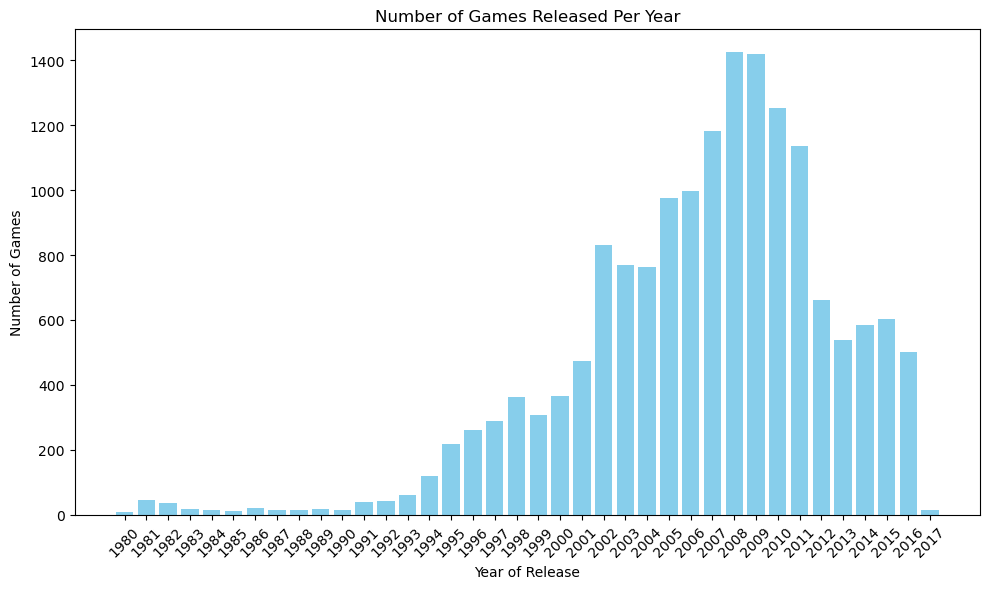

In [186]:
# Group by 'year_of_release' and count the number of games released per year
yearly_game_sales = DF.groupby('year_of_release')['name'].count()

# Create a bar chart
years = yearly_game_sales.index.astype(str)  # Convert the years to string for better labeling
release_count = yearly_game_sales.values  # Get the count of games released

plt.figure(figsize=(10, 6))  # Set figure size
plt.bar(years, release_count, color='skyblue')  # Create bar chart with color customization
plt.title('Number of Games Released Per Year')  # Add title to the chart
plt.xlabel('Year of Release')  # Label x-axis
plt.ylabel('Number of Games')  # Label y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to ensure labels fit
plt.show()  # Display the bar chart

-It is important to note there is a clear pattern of growth from 1980 to 2009. This would correlate with the development of technology and new gaming systems being produced and distributed globally. 
-The sudden decrease in game sales starting in 2010 can be a reflection of global economic patterns due to the 2008 Global Financial Crisis. 
-The Global Financial Crisis started in the U.S. (correlates to the na_sales column) with the collapse of the housing bubble, and multiple financial institutions claiming bankruptcies which lead to government bailouts. 
-Europe (correlates to the eu_sales column) was significantly affected due to the strong financial ties with the U.S. which led to a recession in several European countries. 
-Japan's (correlates to the jp_sales column) economy was already in a long term stagnation period, but the Global Financial Crisis worsened issues like deflation and low economic growth. 
-The rapid decrease in sales could possibly be attributed to the financial recovery of the 2008 Global Financial Crisis. 

In [187]:
# How sales varied from platform to platform (sales are in USD million)
game_platform_count = DF.groupby('platform')['total_sales'].count()
print(game_platform_count.sort_values())

platform
GG         1
PCFX       1
TG16       2
3DO        3
WS         6
SCD        6
NG        12
GEN       29
DC        52
GB        97
NES       97
2600     116
WiiU     147
SAT      172
SNES     238
XOne     247
N64      314
PS4      390
PSV      428
3DS      510
GC       542
XB       806
GBA      811
PC       949
PS      1183
PSP     1192
X360    1231
Wii     1284
PS3     1303
DS      2115
PS2     2129
Name: total_sales, dtype: int64


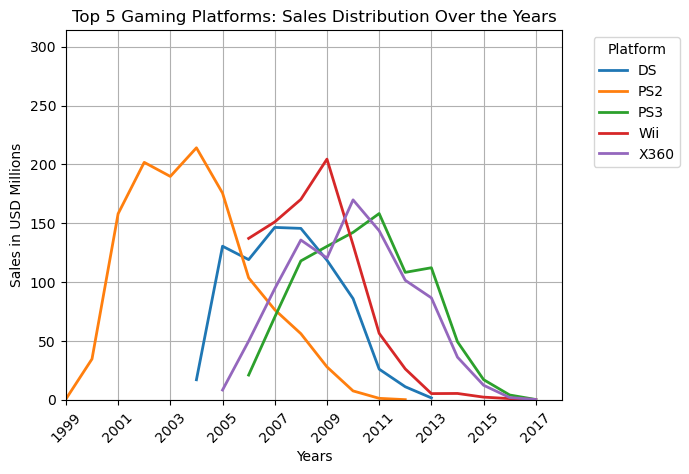

In [188]:
# Taking the top 5 platforms and creating a distribution based off total sales per year

# Calculate total sales for each platform
total_sales_per_platform = DF.groupby('platform')['total_sales'].sum()

# Get the top 5 platforms by total sales
top_5_platforms = total_sales_per_platform.nlargest(5).index

# Filter the DF to include only the top 5 platforms
DF_top5 = DF[DF['platform'].isin(top_5_platforms)]

# Pivot filtered data to get platforms as columns
platform_sales_top5 = DF_top5.pivot_table(index='year_of_release', columns='platform',values='total_sales',aggfunc='sum')

# Plotting each platform
ax = platform_sales_top5.plot(
    kind='line',
    xlim=[1999, 2018],  # Setting the range for years
    ylim=[0, platform_sales_top5.max().max() + 100],  # Setting the range for sales in millions
    grid=True,
    linewidth=2, # Optional: line width for better visibility
)

plt.xticks(range(1999,2019,2), rotation=45)

plt.title("Top 5 Gaming Platforms: Sales Distribution Over the Years")
plt.xlabel("Years")
plt.ylabel("Sales in USD Millions")
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [189]:
# Build pivot table with guaranteed numeric values

platform_year_sales = DF.pivot_table(
    index='year_of_release',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
)

platform_year_sales.dtypes

platform
2600    float64
3DO     float64
3DS     float64
DC      float64
DS      float64
GB      float64
GBA     float64
GC      float64
GEN     float64
GG      float64
N64     float64
NES     float64
NG      float64
PC      float64
PCFX    float64
PS      float64
PS2     float64
PS3     float64
PS4     float64
PSP     float64
PSV     float64
SAT     float64
SCD     float64
SNES    float64
TG16    float64
WS      float64
Wii     float64
WiiU    float64
X360    float64
XB      float64
XOne    float64
dtype: object

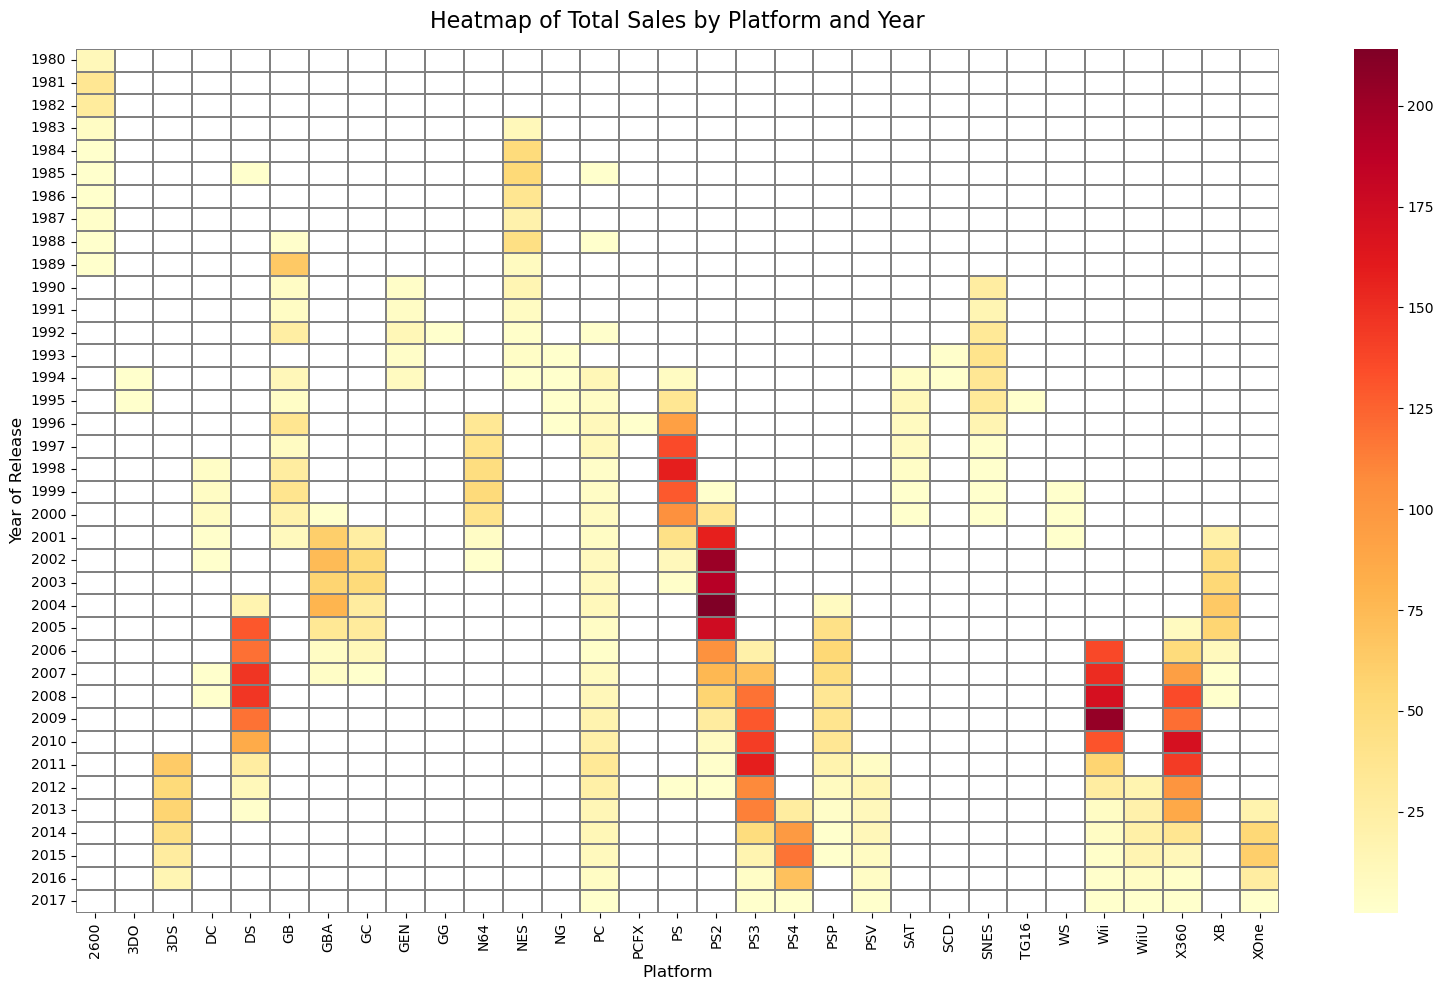

In [190]:
# Heatmap

plt.figure(figsize=(16, 10))

sns.heatmap(
    platform_year_sales,
    cmap="YlOrRd",      # yellow → red = increasing sales
    linewidths=0.3,
    linecolor="gray"
)

plt.title("Heatmap of Total Sales by Platform and Year", fontsize=16, pad=15)
plt.xlabel("Platform", fontsize=12)
plt.ylabel("Year of Release", fontsize=12)
plt.tight_layout()
plt.show()

The heatmap reveals generation patterns in platform performance, early platforms (1980-1993) show sparse and low sales, reflecting limited datasest coverage and a smaller market.

Sales increase beginning in the mid-1990's, and the period from 2001-2011 stands out with the strongest sales intensity, particularly for PS2, DS, Wii, and Xbox 360. These platforms display the darkest cells in the heatmap, indicating dominant market share and widespread game releases during these years.

After 2012, sales intensity drops for all platforms becasue the dataset largely excludes digital sales, leading to lower observed totals. Overall, the heatmap confirms that the most reliable and representative period for platform analysis is approximately 2001-2011.

In [191]:
# Filter DF for 2014-2017
DF_new = DF[(DF['year_of_release'] >= 2014) & (DF['year_of_release'] <= 2017)]

# Compute platform x year sales inside the filtered window
platform_year_sales_new = (
    DF_new.groupby(['platform', 'year_of_release'])['total_sales']
    .sum()
    .reset_index()
)

# Platforms active in earlier filtered years 
active_before_final_year = platform_year_sales_new[
    (platform_year_sales_new['year_of_release'] < 2017) &
    (platform_year_sales_new['total_sales'] > 0)
]['platform'].unique()

# Platforms active in final year
active_in_final_year = platform_year_sales_new[
    platform_year_sales_new['year_of_release'] == 2017
]['platform'].unique()

# Platforms that disappeared
missing_in_final_year = list(set(active_before_final_year) - set(active_in_final_year))

print("Platforms that had sales earlier in the window but none in 2017:")
print(missing_in_final_year)


Platforms that had sales earlier in the window but none in 2017:
['PSP', '3DS']


In [192]:
# Calculate lifespan for missing platforms

missing_platform_lifespan = platform_year_sales[platform_year_sales['platform'].isin(missing_platforms_2017)]
missing_platform_lifespan = missing_platform_lifespan.groupby('platform')['year_of_release'].agg(['min', 'max']).reset_index()
missing_platform_lifespan['lifespan_years'] = missing_platform_lifespan['max'] - missing_platform_lifespan['min']

# Print the lifespan of missing platforms
print(missing_platform_lifespan.sort_values(by='lifespan_years', ascending=False))


KeyError: 'platform'

Using the same modeling window (2014-2017) instead of the full dataset. I calculated total annual sales per platform within the filtered period and identified platforms that were active during the earlier years of the window but no longer appear in 2017. These platforms represent systems that declined or exited the market during the selected period, making the analysis consistent with the chosen forecasting timeframe.

In [ ]:
# Now find how long it generally takes for new platforms to appear and old ones to fade

# Calculate the first and last apearance of each platform
platform_lifespan = DF.groupby('platform')['year_of_release'].agg(['min','max']).reset_index()
platform_lifespan.columns = ['platform', 'first_appearance', 'last_appearance']
platform_lifespan['lifespan'] = platform_lifespan['last_appearance'] - platform_lifespan['first_appearance']

# Check calculations
print(platform_lifespan)

   platform  first_appearance  last_appearance  lifespan
0      2600              1980             1989         9
1       3DO              1994             1995         1
2       3DS              2011             2016         5
3        DC              1998             2008        10
4        DS              1985             2013        28
5        GB              1988             2001        13
6       GBA              2000             2007         7
7        GC              2001             2007         6
8       GEN              1990             1994         4
9        GG              1992             1992         0
10      N64              1996             2002         6
11      NES              1983             1994        11
12       NG              1993             1996         3
13       PC              1985             2017        32
14     PCFX              1996             1996         0
15       PS              1994             2012        18
16      PS2              1999  

In [ ]:
# Find the year when each platform first appeared
new_platforms = platform_lifespan[['platform', 'first_appearance']].sort_values(by='first_appearance')

# Calculate the intervals between new platform introductions
new_platforms['introduction_interval'] = new_platforms['first_appearance'].diff().fillna(0).astype(int)

# Check calculations
print(new_platforms)

   platform  first_appearance  introduction_interval
0      2600              1980                      0
11      NES              1983                      3
4        DS              1985                      2
13       PC              1985                      0
5        GB              1988                      3
23     SNES              1990                      2
8       GEN              1990                      0
9        GG              1992                      2
22      SCD              1993                      1
12       NG              1993                      0
21      SAT              1994                      1
15       PS              1994                      0
1       3DO              1994                      0
24     TG16              1995                      1
14     PCFX              1996                      1
10      N64              1996                      0
3        DC              1998                      2
25       WS              1999                 

In [ ]:
# Find the average length of time for new platforms to appear
average_interval = new_platforms['introduction_interval'].mean().astype(int)

# Display the average length of time for new platforms to appear
print(average_interval)

1


In [ ]:
# Take into consideration the standard deviation
average_interval_std = new_platforms['introduction_interval'].std()
print(average_interval_std)

print(f"The average length of time for new platforms to appear, and old ones to fade out, is about 1-2 years.")

1.2092830898502835
The average length of time for new platforms to appear, and old ones to fade out, is about 1-2 years.


In [ ]:
# Moving forward we should only use data from 2014-2017, due to such a dynamically changing industry with constant growth and development we don't want to take too long a time interval. 

# Create the dataframe we will be focusing on moving forward
DF_new = DF[(DF['year_of_release'] >= 2014) & (DF['year_of_release']<= 2016)]

# Put the new dataframe in chronological order based on the year_of_release column
DF_new_sorted = DF_new.sort_values(by='year_of_release', ascending=True)

# Display new dataframe
print(DF_new_sorted)

                                                    name platform  \
10727                       The Walking Dead: Season Two     X360   
9545                      One Piece: Unlimited World Red      PSV   
12250                           12-Sai. Honto no Kimochi      3DS   
5143                               Skylanders: Trap Team     XOne   
5165              Sid Meier's Civilization: Beyond Earth       PC   
...                                                  ...      ...   
6162                              Monster Hunter Stories      3DS   
14046  Nobunaga's Ambition: Sphere of Influence - Sen...      PS3   
14079                                    Transport Fever       PC   
6427                            Batman: Return to Arkham      PS4   
16714                                Winning Post 8 2016      PSV   

       year_of_release       genre  na_sales  eu_sales  jp_sales  other_sales  \
10727             2014   Adventure      0.04      0.05      0.00         0.01   
9545     

In [ ]:
# Find which platforms are leading in sales within new dataframe
leading_platforms = DF_new_sorted.groupby(['platform'])['total_sales'].sum().reset_index()

# Display data for platform sales within the new dataframe
print(leading_platforms.sort_values(by='total_sales', ascending=False))

# The top 5 leading platforms in sales are PS4, XOne, 3DS, PS3, and X360. 

  platform  total_sales
3      PS4       285.35
9     XOne       140.20
0      3DS        86.84
2      PS3        70.48
8     X360        50.48
7     WiiU        44.35
1       PC        28.19
5      PSV        22.56
6      Wii         8.65
4      PSP         0.52


In [ ]:
# Which platforms are growing and which are shrinking

# Calculate the total annual sales for each platform
annual_platform_sales = DF_new_sorted.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()

# Display calculations
print(annual_platform_sales)

   platform  year_of_release  total_sales
0       3DS             2014        43.95
1       3DS             2015        27.75
2       3DS             2016        15.14
3        PC             2014        12.96
4        PC             2015         9.58
5        PC             2016         5.53
6        PC             2017         0.12
7       PS3             2014        49.23
8       PS3             2015        17.06
9       PS3             2016         4.01
10      PS3             2017         0.18
11      PS4             2014        97.70
12      PS4             2015       117.22
13      PS4             2016        69.94
14      PS4             2017         0.49
15      PSP             2014         0.40
16      PSP             2015         0.12
17      PSV             2014        12.00
18      PSV             2015         6.25
19      PSV             2016         4.25
20      PSV             2017         0.06
21      Wii             2014         5.32
22      Wii             2015      

In [ ]:
# Pivot the data to see sales trends over time
sales_trend_pivot = annual_platform_sales.pivot(index='year_of_release', columns='platform', values='total_sales')

# Calculate year-over-year growth for each platform
sales_trend = sales_trend_pivot.pct_change()

# Determine if platforms are growing or shrinking based on recent years performance
platform_trend = sales_trend.mean().sort_values(ascending=False).reset_index()
platform_trend.columns = ['platform', 'average_growth']

# Display calculation
print(platform_trend)
# From this data for the specific time period, all platforms are showing a decrease in sales growth on average. 
# The platforms that show the least decrease in average growth are: PSP, 3DS, PS4, XOne, and PC
# The platforms that show the greatest decrease in average growth are: X360, PS3, Wii, WiiU, and PSV

  platform  average_growth
0      PSP       -0.233333
1      3DS       -0.274338
2      PS4       -0.398848
3     XOne       -0.474858
4       PC       -0.553953
5      PSV       -0.595016
6     WiiU       -0.648305
7      Wii       -0.655058
8      PS3       -0.791174
9     X360       -0.807535


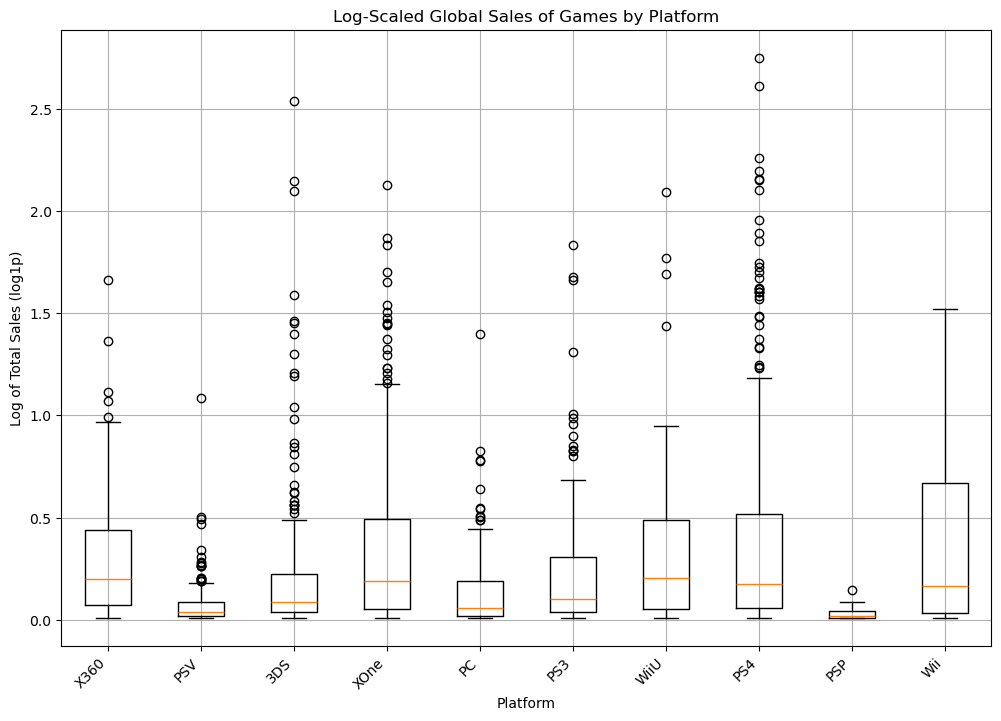

In [ ]:
DF_new_sorted['log_total_sales'] = np.log1p(DF_new_sorted['total_sales'])

plt.figure(figsize=(12, 8))

plt.boxplot(
    [DF_new_sorted[DF_new_sorted['platform'] == platform]['log_total_sales']
     for platform in DF_new_sorted['platform'].unique()],
    labels=DF_new_sorted['platform'].unique()
)

plt.title("Log-Scaled Global Sales of Games by Platform")
plt.xlabel("Platform")
plt.ylabel("Log of Total Sales (log1p)")
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.show()


From the boxplot you can see the differences in average sales growth, this helps to visualize the platforms showing the least and greatest decrease in average growth. 

In [ ]:
platform_stats_custom = DF_new_sorted.groupby('platform').agg(
    games_released = ('total_sales', 'count'),
    mean_sales     = ('total_sales', 'mean'),
    median_sales   = ('total_sales', 'median'),
    std_sales      = ('total_sales', 'std'),
    q1_sales       = ('total_sales', lambda x: x.quantile(0.25)),
    q3_sales       = ('total_sales', lambda x: x.quantile(0.75)),
    min_sales      = ('total_sales', 'min'),
    max_sales      = ('total_sales', 'max')
).reset_index()

print(platform_stats_custom)


  platform  games_released  mean_sales  median_sales  std_sales  q1_sales  \
0      3DS             212    0.409623          0.09   1.188177    0.0375   
1       PC             151    0.185894          0.06   0.333325    0.0200   
2      PS3             220    0.319545          0.11   0.634290    0.0400   
3      PS4             371    0.767817          0.19   1.623473    0.0600   
4      PSP              14    0.037143          0.02   0.044277    0.0100   
5      PSV             296    0.076014          0.04   0.141358    0.0200   
6      Wii              11    0.770000          0.18   1.118517    0.0350   
7     WiiU              74    0.597973          0.23   1.152245    0.0525   
8     X360             112    0.449286          0.22   0.627982    0.0775   
9     XOne             226    0.620044          0.21   1.049776    0.0525   

   q3_sales  min_sales  max_sales  
0    0.2500       0.01      11.68  
1    0.2100       0.01       3.05  
2    0.3600       0.01       5.27  
3    0.6

-From previous analysis the data showing platforms with the least decrease in average growth for the designated time period were: PSP, 3DS, PS4, XOne, and PC

-It does need to be taken into consideration the time in which the platform was released and how long between release and the introduction of a new platform

-The PS4 and the XOne were both released in 2013 which would directly cause competition of sales between the two systems, they are both newer platforms for the designated time period that it would make sense that their average growth are the highest (most likely caused through direct competition of the two different platforms) 

-The PSV was released in 2011, but two years later the PS4 and XOne were released. This is a direct explanation as to why the average growth for this platform are significantly lower and showed one of the highest decrease in total sales

-From previous analysis the data showing the top shrinking platforms for the designated time period were X360, PS3, Wii, WiiU, and PSV

-Those results are directly reflected in the total sales for these specific platforms, they are all significantly smaller and have the highest decrease in average growth

-In 1985, both the DS and PC were released and show almost identical average sales (the DS only leading by $4 USD Millions). This platform was the only system out until 1988, causing them to be the only two systems games were, at the time, being produced for. 

-From 1988-2001, a new platform was being released every year back to back which would explain why those individual platforms are not on this data set, there was constant competition and no room for sole focus and development of games for just one system, companies were trying to keep up with popularity and demand.

-Then in 2004, three years after the newest platform (XB) was released, a brand new system hit the market; the PSP (this system allowed gamers to take their games with them in a portable hand held device). The convenience and easy access of this device would explain the large amount of sales in just one year, as well as this particular system having the least impacted decrease in average growth. 

-To keep up with competition, X360 came out in 2005. Both systems started polarizing the market with games specifically only accessible on their systems, this created a divide in preference within the gaming world. For Xbox, games like Halo, Gears of War, and Mass Effect caused strong allegiance for this particular population of gamers. Which would explain the dramatic difference in total sales between the PSP and X360.  

-In 2006, two new systems were released to keep up with competition and demand; the Wii, and the PS3. Wii was a system that was unlike any other on the market, it involved direct physical interaction from the gamer and the game, this new type of system while somewhat successful had to directly compete with a platform that already had an established base of loyal gamers. To keep up with the competition between Xbox and Playstation, Playstation released the PS3 along with system specific games like Uncharted, The Last of Us, and Gran Turismo 5. All of which were tremendous successes and grew a large following for these specific games. This would explain the huge major difference in total sales between these two platforms, as well as the somewhat close decrease in average growth. 

-Until 2011, the PS3 and Wii were the only newer gaming platforms on the market, this is a five year time span for sales to grow, which is exactly what it did for Playstation. 

-In 2011, the PSV was released, and was met with strong commercial success than the Wii (again most likely due to the already established fan base for Playstation products and games). 

-In 2012, the WiiU was released, it had greater commercial success than the PSV for multiple reasons, it was a portable gaming system that had access to all Wii games with a large amount of nostalgic games like Mario Kart 8, Super Mario 3D World, Super Smash Bros, and The Legend of Zelda: The Wind Waker HD. It was also the only new platform on the market until 2013, allowing it to accumulate a greater amount of sales in that time period.

In [ ]:
# How do user and critic reviews affect the sales of the PS3

# Filter data for the PSP platform
ps3_data = DF_new[DF_new['platform'] == 'PS3']

# Group by user_score and critic_score, summing up total sales for each score combination
ps3_reviews = ps3_data.groupby(['user_score', 'critic_score'])['total_sales'].sum().reset_index()

# Print the results
print(ps3_reviews)


    user_score  critic_score  total_sales
0          3.1          55.0         0.78
1          3.4          56.0         0.11
2          3.5          40.0         0.08
3          3.5          58.0         0.03
4          3.7          36.0         0.08
5          4.1          62.0         0.41
6          4.1          78.0         0.95
7          4.3          73.0         0.61
8          4.5          43.0         0.10
9          4.6          67.0         0.11
10         5.3          54.0         0.30
11         5.8          49.0         0.10
12         5.9          66.0         0.58
13         6.0          43.0         0.06
14         6.2          63.0         0.02
15         6.3          59.0         0.10
16         6.3          77.0         0.62
17         6.4          64.0         0.06
18         6.8          75.0         0.18
19         6.8          80.0         0.93
20         6.8          81.0         0.43
21         6.9          73.0         0.01
22         7.1          77.0      

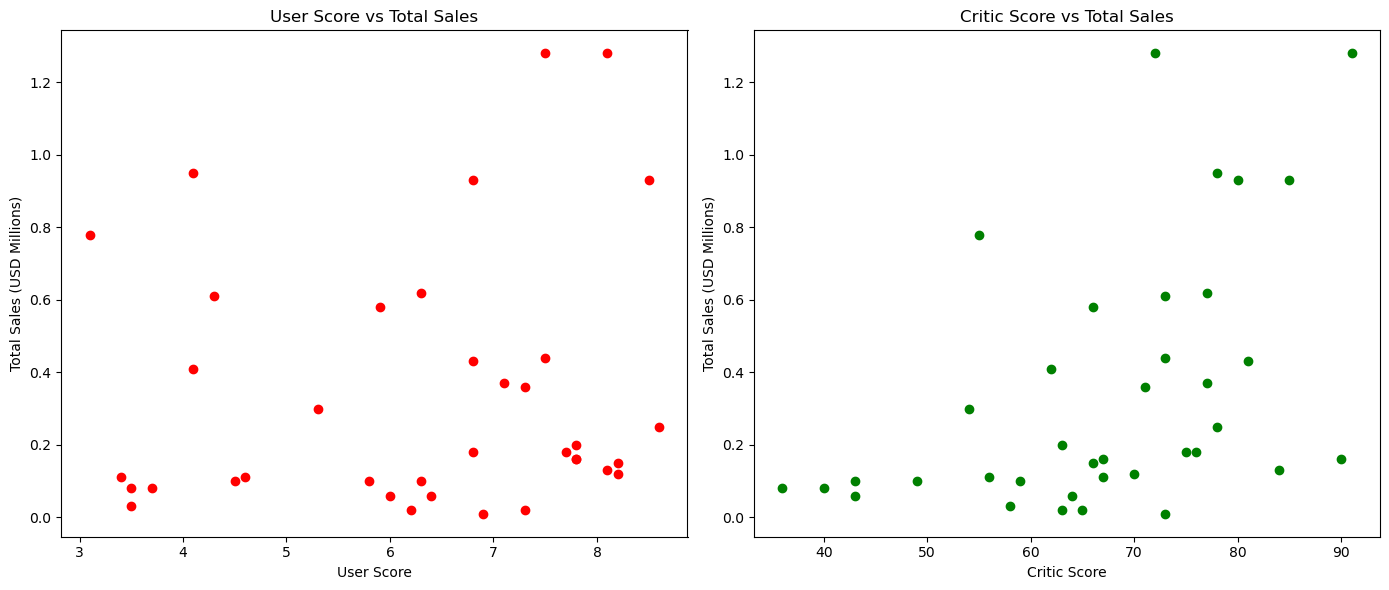

In [ ]:
# Create a scatter plot for data of user_score, critic_score, and total_sales for the PS3

# Create scatter plots
plt.figure(figsize=(14,6))

# Scatter plot for user_score vs total_sales
plt.subplot(1, 2, 1)
plt.scatter(ps3_reviews['user_score'], ps3_reviews['total_sales'], color='red')
plt.title('User Score vs Total Sales')
plt.xlabel('User Score')
plt.ylabel('Total Sales (USD Millions)')

# Scatter plot for critic_score vs total_sales
plt.subplot(1, 2, 2)
plt.scatter(ps3_reviews['critic_score'], ps3_reviews['total_sales'], color='green')
plt.title('Critic Score vs Total Sales')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (USD Millions)')

# Show plots
plt.tight_layout()
plt.show()

In [ ]:
# Find the correlation coefficient between user_score and total_sales

user_sales_correlation = ps3_data['user_score'].corr(ps3_data['total_sales'])
print(f"{user_sales_correlation: .2f}")

-0.17


In [ ]:
# Find the correlation coefficient between critic_score and total_sales

critic_sales_correlation = ps3_data['critic_score'].corr(ps3_data['total_sales'])
print(f"{critic_sales_correlation:.2f}")

0.46


-While the scatter plots for both user_score and critic_score in relation to total_sales appear almost identical, when conducting calculations to find the correlation between these factors it provides a very different picture.

-For there to be a strong correlation, either negative or positive, you want the number produced from calculations to be as close to 1 or -1. 

-The user_score provided a correlation of -0.17, where as the critic_score provided a correlation of .46. 

-From this it is clear that the critic scores impact sales more than the user scores. 

-Compare the sales of same games (DF_new_sorted) on other platforms

-We will use the top four platforms with the highest, as found in previous data

-The four platforms with the highest sales are: PS4, 3DS, XOne, and X360

In [ ]:
# For each multi-platform game, find the platform with the highest sales
best_platform_per_game = sales_comparison.idxmax(axis=1)

# Count how often each platform is the top seller
best_platform_counts = best_platform_per_game.value_counts()
print("Platform with highest sales for multi-platform titles (2014–2016):")
print(best_platform_counts)


Platform with highest sales for multi-platform titles (2014–2016):
PS4     232
PS3      47
PSV      35
3DS      20
X360     10
XOne      8
PC        6
WiiU      6
Wii       4
Name: count, dtype: int64


In [ ]:
multiplatform_avg_sales = (
    DF_train[DF_train['name'].isin(sales_comparison.index)]
    .groupby('platform')['total_sales']
    .mean()
    .sort_values(ascending=False)
)

print("\nAverage sales per platform for multi-platform games (2014–2016):")
print(multiplatform_avg_sales)



Average sales per platform for multi-platform games (2014–2016):
platform
PS4     0.851667
Wii     0.770000
XOne    0.583365
X360    0.451818
3DS     0.379459
PS3     0.359037
WiiU    0.355000
PC      0.194151
PSV     0.125294
PSP     0.066000
Name: total_sales, dtype: float64


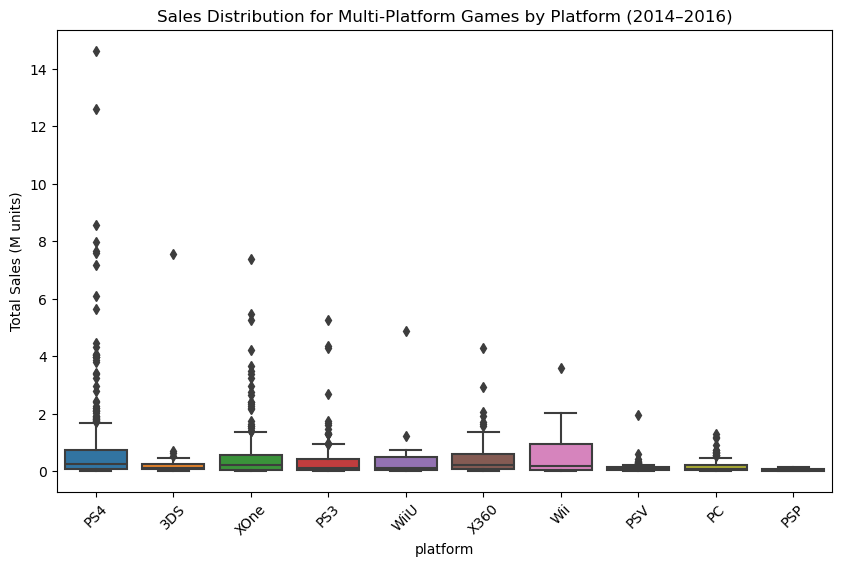

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=DF_train[DF_train['name'].isin(sales_comparison.index)],
    x='platform',
    y='total_sales'
)
plt.title("Sales Distribution for Multi-Platform Games by Platform (2014–2016)")
plt.ylabel("Total Sales (M units)")
plt.xticks(rotation=45)
plt.show()


For a direct cross-platform comparison, I identified all games released on multiple platforms within the 2014-2016 training window (368 titles). For each game, I compared total sales across platforms and determined which system generated the highest sales. 

The PlayStation 4 dominated multi-platform performance, winning 232 titles (~63%) and achieving the highest average sales per game (0.85M units). 

The Xbox family performed moderately well (XOne + X360), but substantially below PS4, while handheld systems and PC versions tended to show significantly lower sales. These results provide a clear side-by-side comparison of how the same titles performed across different platforms.

In [ ]:
# First will analyze data for the PS4

# Group only data for PS4
ps4_data = DF_new_sorted[DF_new_sorted['platform'] == 'PS4']

# Show user_score, critic_score, and total_sales for the PS4
ps4_reviews = ps4_data.groupby(['user_score', 'critic_score'])['total_sales'].sum().reset_index()

# Display data
print(ps4_reviews)

     user_score  critic_score  total_sales
0           1.5          32.0         0.20
1           1.9          25.0         0.06
2           2.0          48.0         0.01
3           2.3          42.0         0.01
4           3.3          81.0         0.30
..          ...           ...          ...
213         8.7          69.0         0.42
214         8.7          79.0         0.15
215         8.7          85.0         0.36
216         8.8          89.0         1.66
217         9.2          92.0         3.97

[218 rows x 3 columns]


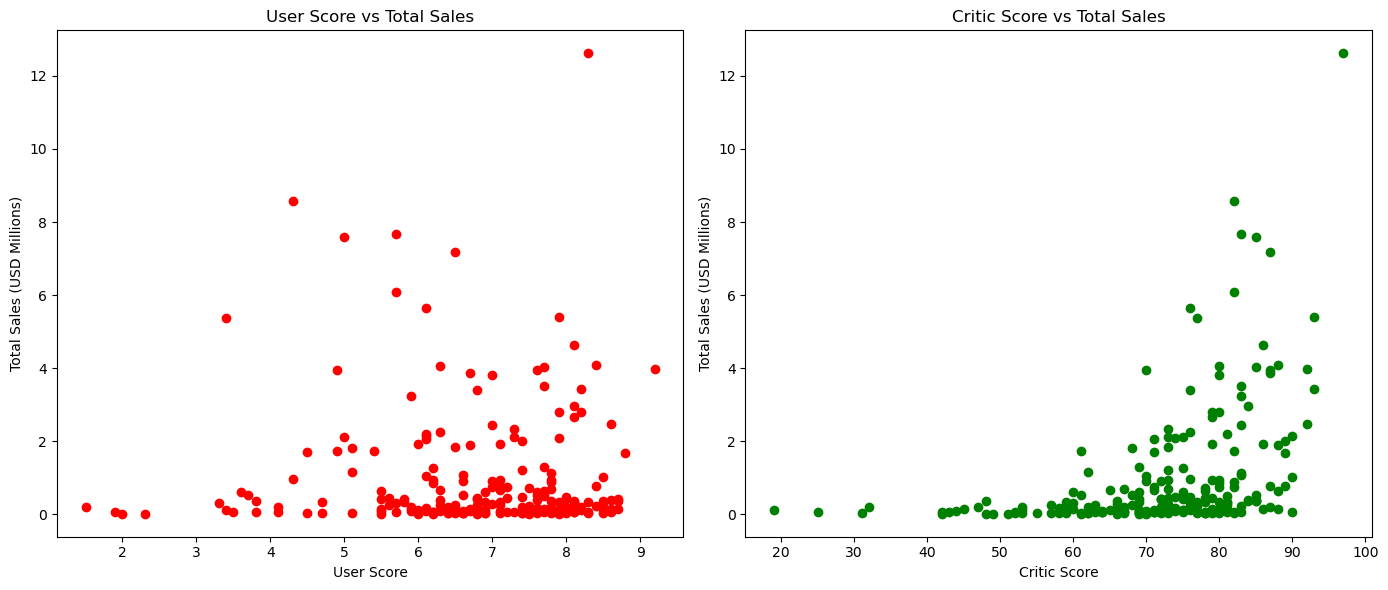

In [ ]:
# Create a scatter plot for data of user_score, critic_score, and total_sales for the PS4

# Create scatter plots
plt.figure(figsize=(14,6))

# Scatter plot for user_score vs total_sales
plt.subplot(1, 2, 1)
plt.scatter(ps4_reviews['user_score'], ps4_reviews['total_sales'], color='red')
plt.title('User Score vs Total Sales')
plt.xlabel('User Score')
plt.ylabel('Total Sales (USD Millions)')

# Scatter plot for critic_score vs total_sales
plt.subplot(1, 2, 2)
plt.scatter(ps4_reviews['critic_score'], ps4_reviews['total_sales'], color='green')
plt.title('Critic Score vs Total Sales')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (USD Millions)')

# Show plots
plt.tight_layout()
plt.show()

In [ ]:
# Find the correlation coefficient between user_score and total_sales

user_sales_correlation_ps4 = ps4_data['user_score'].corr(ps4_data['total_sales'])
print(f"{user_sales_correlation_ps4: .2f}")

-0.04


In [ ]:
# Find the correlation coefficient between critic_score and total_sales

critic_sales_correlation_ps4 = ps4_data['critic_score'].corr(ps4_data['total_sales'])
print(f"{critic_sales_correlation_ps4:.2f}")

0.40


-When looking at the scatter plot the user_score, appears to pull towards the left of the graph indicating a somewhat negative impact on sales. 

-The correlation coefficient between user_score and total_sales came out to be -0.03, show a weak negative correlation. This validates our analysis of the scatter plot. 

-Whereas when looking at the scatter plot the critic_score appears to show a constant growth and push to the right.

-The correlation coefficient between critic_score and total_sales came out to be 0.41, showing a somewhat positive correlation. This also validates our analysis of the scatter plot. 

-Comparing PS4 results with the PS3 results, the critic_scores are almost identical with the PS3 being a 0.40 and the PS4 being a 0.41. 

-When comparing the user_score between the two platforms, it is actually a little different. The PS3 user_score, while weak, had a positive correlation which meant growth of sales (even if minutely). As opposed to the PS4 results which were -0.03, this showed, again minutely, a decrease in sales. 

-Both analysis for these two platforms do show a positive impact on sales depending on the rating of critic scores (the better score = better sales), whereas the user scores show opposite relationships. 

In [ ]:
# Now we will analyze the data for XOne

# Group data for XOne
xone_data = DF_new_sorted[DF_new_sorted['platform'] == 'XOne']

# Show user_score, critic_score, and total_sales for XOne
xone_reviews = DF_new_sorted.groupby(['critic_score', 'user_score'])['total_sales'].sum().reset_index()

# Display results
print(xone_reviews)


     critic_score  user_score  total_sales
0            19.0         3.4         0.12
1            20.0         3.1         0.09
2            25.0         1.9         0.06
3            26.0         2.4         0.02
4            31.0         4.5         0.02
..            ...         ...          ...
566          93.0         9.3         0.72
567          95.0         7.3         0.75
568          96.0         7.9         1.17
569          97.0         7.9         5.47
570          97.0         8.3        12.62

[571 rows x 3 columns]


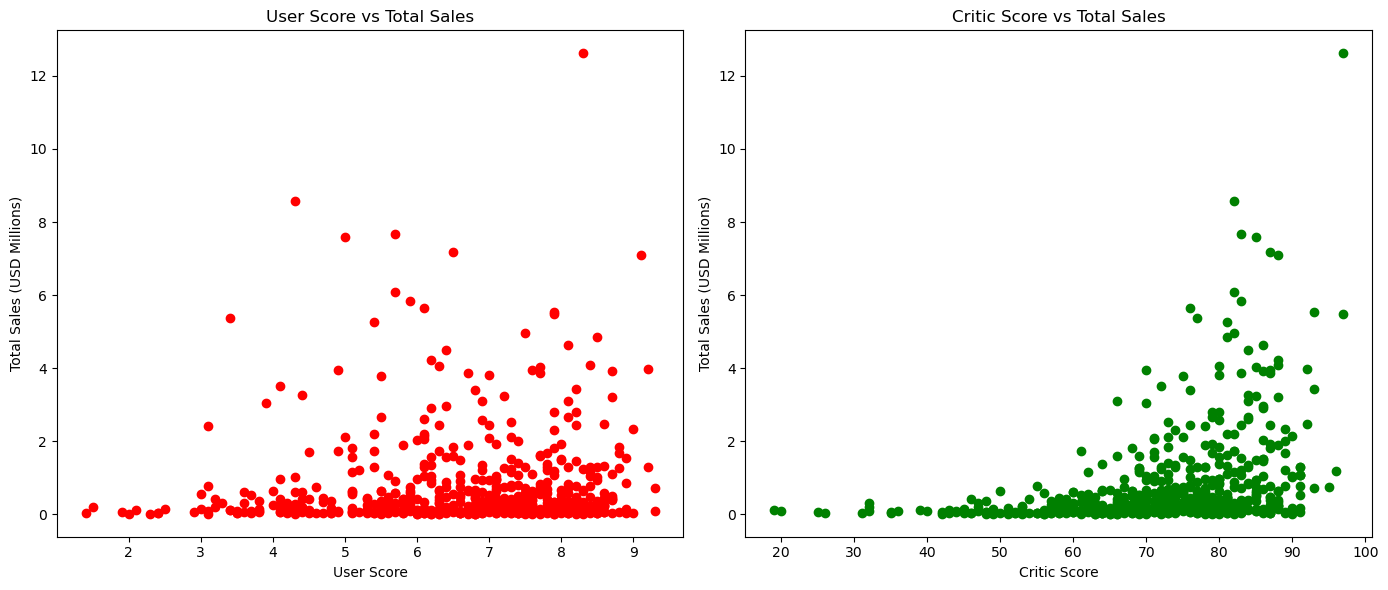

In [ ]:
# Create a scatter plot for data of user_score, critic_score, and total_sales for the XOne

# Create scatter plots
plt.figure(figsize=(14,6))

# Scatter plot for user_score vs total_sales
plt.subplot(1, 2, 1)
plt.scatter(xone_reviews['user_score'], xone_reviews['total_sales'], color='red')
plt.title('User Score vs Total Sales')
plt.xlabel('User Score')
plt.ylabel('Total Sales (USD Millions)')

# Scatter plot for critic_score vs total_sales
plt.subplot(1, 2, 2)
plt.scatter(xone_reviews['critic_score'], xone_reviews['total_sales'], color='green')
plt.title('Critic Score vs Total Sales')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (USD Millions)')

# Show plots
plt.tight_layout()
plt.show()

In [ ]:
# Find the correlation coefficient between user_score and total_sales

user_sales_correlation_xone = xone_data['user_score'].corr(xone_data['total_sales'])
print(f"{user_sales_correlation_xone: .2f}")

-0.07


In [ ]:
# Find the correlation coefficient between critic_score and total_sales

critic_sales_correlation_xone = xone_data['critic_score'].corr(xone_data['total_sales'])
print(f"{critic_sales_correlation_xone:.2f}")

0.43


In [ ]:
 # When looking at the scatter plot for critic and user scores in relation to total sales, they appear almost identical with the user_score plot pulling slightly to the left whereas the critic_score plot shows constant growth and push to the right. 
# After finding the correlation coefficient for user scores, it does verify that user scores have a somewhat negative effect on total sales, it is weaker than what it was for the PS4. XOne resulted in a -0.07, whereas the PS4 resulted in a -0.03. 

# After finding the correlation coefficient for critic scores, it produced almost, again, identical results as the PS3 and PS4 with a result of 0.42. This also verifies a strong positive correlation with critic scores and total sales (the better the score = the better the sales).

-When looking at the scatter plot for critic and user scores in relation to total sales, they appear almost identical with the user_score plot pulling slightly to the left whereas the critic_score plot shows constant growth and push to the right. 

-After finding the correlation coefficient for user scores, it does verify that user scores have a somewhat negative effect on total sales, it is weaker than what it was for the PS4. XOne resulted in a -0.07, whereas the PS4 resulted in a -0.03. 

-After finding the correlation coefficient for critic scores, it produced almost, again, identical results as the PS3 and PS4 with a result of 0.42. This also verifies a strong positive correlation with critic scores and total sales (the better the score = the better the sales).

In [ ]:
# Now we will examine the 3DS and X360

# Group data for 3DS
_3ds_data = DF_new_sorted[DF_new_sorted['platform'] == '3DS']

# Show data for user_score, critic_score, and total_sales
_3ds_data_reviews = _3ds_data.groupby(['critic_score', 'user_score'])['total_sales'].sum().reset_index()

# Display data
print(_3ds_data_reviews)

    critic_score  user_score  total_sales
0           26.0         2.4         0.02
1           45.0         5.6         0.03
2           46.0         5.8         0.03
3           47.0         6.3         0.29
4           57.0         4.8         0.36
5           58.0         6.4         0.09
6           58.0         6.8         0.21
7           60.0         7.1         0.18
8           61.0         6.6         0.33
9           63.0         6.1         0.08
10          64.0         5.1         0.04
11          64.0         6.1         1.38
12          65.0         5.6         0.07
13          66.0         6.9         3.05
14          67.0         7.1         0.25
15          68.0         6.8         0.31
16          68.0         7.6         0.21
17          68.0         7.8         0.06
18          69.0         7.0         0.53
19          69.0         7.6         0.26
20          69.0         7.7         0.22
21          69.0         8.8         1.25
22          70.0         7.5      

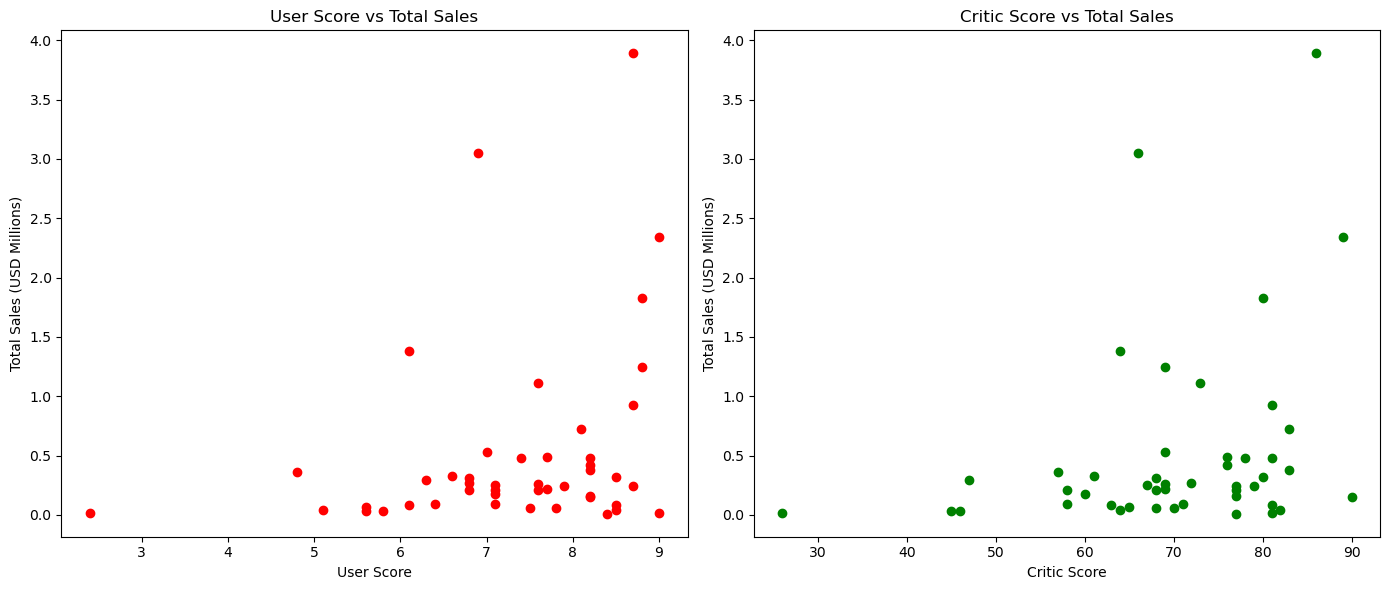

In [ ]:
# Create a scatter plot for data of user_score, critic_score, and total_sales for the 3DS

# Create scatter plots
plt.figure(figsize=(14,6))

# Scatter plot for user_score vs total_sales
plt.subplot(1, 2, 1)
plt.scatter(_3ds_data_reviews['user_score'], _3ds_data_reviews['total_sales'], color='red')
plt.title('User Score vs Total Sales')
plt.xlabel('User Score')
plt.ylabel('Total Sales (USD Millions)')

# Scatter plot for critic_score vs total_sales
plt.subplot(1, 2, 2)
plt.scatter(_3ds_data_reviews['critic_score'], _3ds_data_reviews['total_sales'], color='green')
plt.title('Critic Score vs Total Sales')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (USD Millions)')

# Show plots
plt.tight_layout()
plt.show()

In [ ]:
# Find the correlation coefficient between user_score and total_sales

user_sales_correlation_3ds = _3ds_data['user_score'].corr(_3ds_data['total_sales'])
print(f"{user_sales_correlation_3ds: .2f}")

 0.22


In [ ]:
# Find the correlation coefficient between critic_score and total_sales

critic_sales_correlation_3ds = _3ds_data['critic_score'].corr(_3ds_data['total_sales'])
print(f"{critic_sales_correlation_3ds:.2f}")

0.31


-When analyzing the two scatter plots, they seem identical (again). What is interesting, though, is both show a positive trend pushing the graph to the right. 

-After finding the correlation coefficient for the user scores, it came out to be positive with the results being 0.22. This meaning that the better the score from users, the better the sales. 

-Just like the user scores correlation, the critic scores came back positive as well. The critic score did show a stronger correlation, but not by much, than that of the user scores. 

-Both the scatter plots and correlation coefficients showed that with a better score came better sales.

In [ ]:
# Examine data for the X360
x360_data = DF_new_sorted[DF_new_sorted['platform'] == 'X360']

# Show the critic_score, user_score, and total_sales for X360
x360_reviews = x360_data.groupby(['critic_score', 'user_score'])['total_sales'].sum().reset_index()

# Display results
print(x360_reviews)

    critic_score  user_score  total_sales
0           32.0         3.8         0.08
1           35.0         5.8         0.04
2           44.0         4.4         0.06
3           48.0         4.8         0.06
4           50.0         4.0         0.64
5           50.0         5.3         0.04
6           51.0         4.1         0.05
7           53.0         5.1         0.06
8           58.0         7.5         0.05
9           60.0         6.5         0.10
10          62.0         7.3         0.22
11          64.0         4.1         0.23
12          65.0         5.1         0.17
13          69.0         7.2         1.27
14          69.0         7.3         1.07
15          69.0         7.7         0.07
16          70.0         7.8         0.09
17          70.0         8.7         0.45
18          71.0         7.2         0.05
19          72.0         7.3         1.01
20          74.0         4.4         0.43
21          74.0         6.4         0.73
22          75.0         6.0      

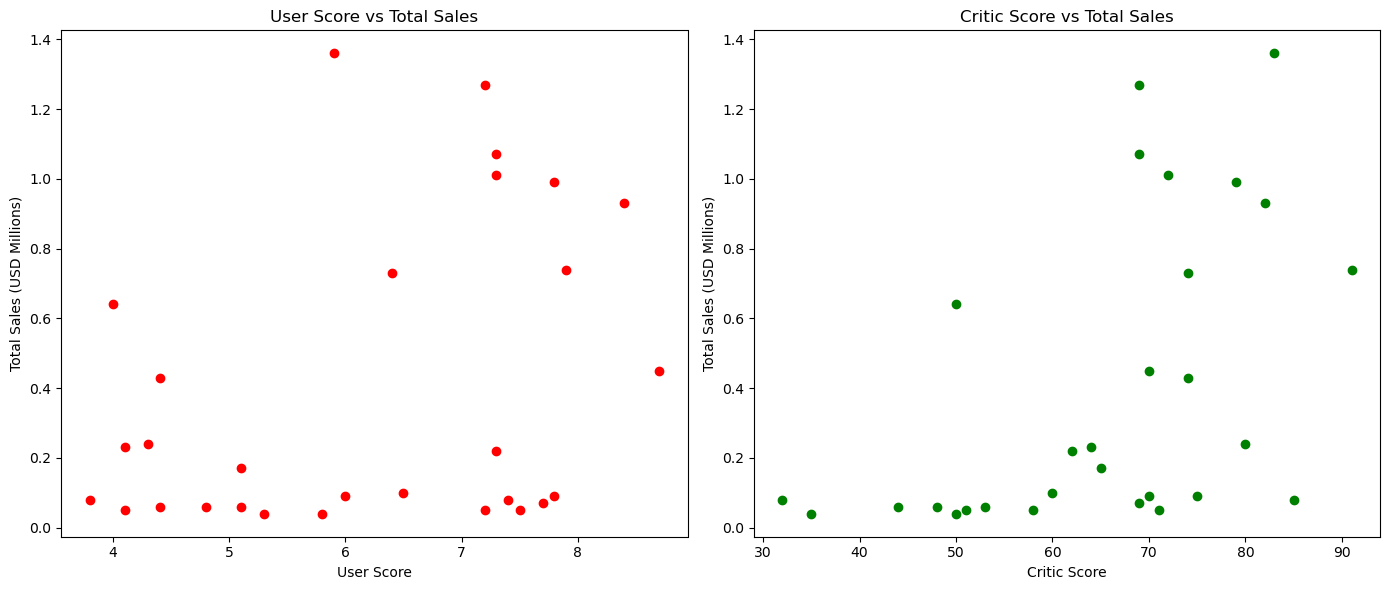

In [ ]:
# Create a scatter plot for data of user_score, critic_score, and total_sales for the X360

# Create scatter plots
plt.figure(figsize=(14,6))

# Scatter plot for user_score vs total_sales
plt.subplot(1, 2, 1)
plt.scatter(x360_reviews['user_score'], x360_reviews['total_sales'], color='red')
plt.title('User Score vs Total Sales')
plt.xlabel('User Score')
plt.ylabel('Total Sales (USD Millions)')

# Scatter plot for critic_score vs total_sales
plt.subplot(1, 2, 2)
plt.scatter(x360_reviews['critic_score'], x360_reviews['total_sales'], color='green')
plt.title('Critic Score vs Total Sales')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (USD Millions)')

# Show plots
plt.tight_layout()
plt.show()

In [ ]:
# Find the correlation coefficient between user_score and total_sales

user_sales_correlation_x360 = x360_data['user_score'].corr(x360_data['total_sales'])
print(f"{user_sales_correlation_x360: .2f}")

-0.13


In [ ]:
# Find the correlation coefficient between critic_score and total_sales

critic_sales_correlation_x360 = x360_data['critic_score'].corr(x360_data['total_sales'])
print(f"{critic_sales_correlation_x360:.2f}")

0.51


-When examining the scatter plots for both critic and user scores, the user score seemed a little weak and more sporadic than the critic score in terms of constant growth. 

-After finding the correlation coefficient for user scores, while it was still positively correlated (minute growth) it was cut in half as compared to the Wii user scores. This could be due to the type of platform the Wii was as opposed to the X360. Wii was first of its kind for interactive gaming, whereas XBox had been an established console for years. It would make sense that people would rely more on user scores as opposed to critic scores with a brand new platform on the market, knowing how the console works, quality of graphics, and how it relates to the game had a higher impact and importance for consumers. 

-With that being said, the X360 had almost the exact same score as the Wii did. 

-Both coefficients show that the better the scores, the better the sales. With a higher emphasis on critic scores as opposed to users.

In [ ]:
# Group by genre and compute total, average, and median sales
genre_data = DF_new_sorted.groupby('genre').agg(
    total_sales=('total_sales', 'sum'),
    avg_sales=('total_sales', 'mean'),
    median_sales=('total_sales', 'median')
).reset_index()

# Compute overall sales across all genres (denominator for market share)
total_sales_overall = genre_data['total_sales'].sum()

# Add market share as a percentage of total sales
genre_data['market_share'] = (genre_data['total_sales'] / total_sales_overall) * 100

# Optional: sort by market share descending
genre_data = genre_data.sort_values('market_share', ascending=False)

print(genre_data)


           genre  total_sales  avg_sales  median_sales  market_share
0         Action       198.87   0.320758         0.090     27.010839
8        Shooter       169.22   1.332441         0.500     22.983729
10        Sports       110.32   0.693836         0.200     14.983837
7   Role-Playing       101.44   0.459005         0.110     13.777742
3           Misc        46.10   0.397414         0.120      6.261375
2       Fighting        28.22   0.470333         0.125      3.832885
6         Racing        27.52   0.398841         0.090      3.737810
4       Platform        18.09   0.476053         0.140      2.457012
1      Adventure        17.55   0.094865         0.030      2.383669
9     Simulation        13.02   0.310000         0.105      1.768397
11      Strategy         3.70   0.102778         0.055      0.502540
5         Puzzle         2.21   0.157857         0.045      0.300166


I calculated each genre's market share as its total sales divided by overall sales in the dataset. This market_share column shows the relative importance of each genre in terms of revenue contribution, making it easier to compare which genres dominate the market versus niche categories.

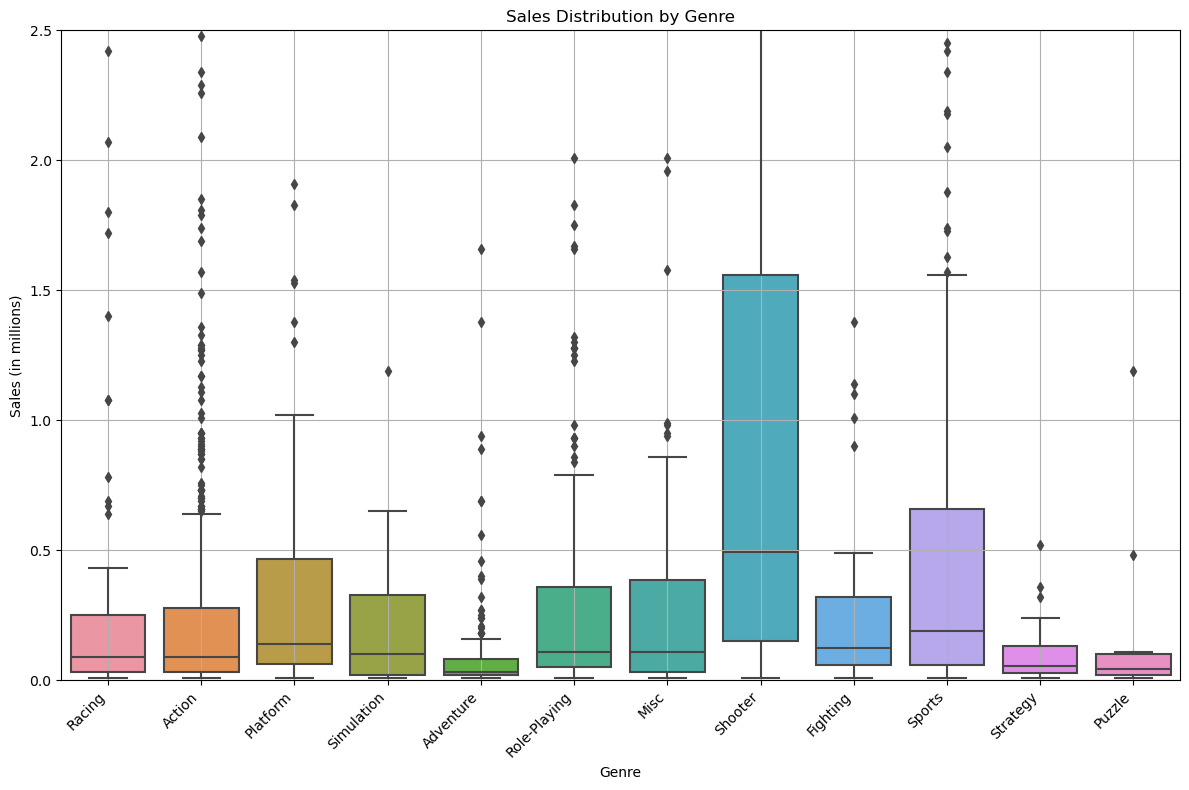

In [ ]:
# Create a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=DF_new_sorted, x='genre', y='total_sales')
plt.title("Sales Distribution by Genre")
plt.xlabel("Genre")
plt.ylabel("Sales (in millions)")
plt.grid(True)
plt.ylim(0, 2.5)  # Adjust the Y-axis limit based on your data
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.tight_layout()
plt.show()

-Based off the data for total sales per game genre, it is clear that the most popular genres are: Action, Shooter, Sports, and Role-Playing

-The highest average sales per genre are: Shooter, Sports, Platform (only .006 more than Fighting), Fighting, and Role-Playing

-The highest median sales per genre are: Shooter, Sports, Platform, Fighting, and a tie between Misc. and Role Playing (both with median sales at .110 USD Millions)

-The least popular genre of games, based off the data for total sales per game genre, are: Puzzle, Strategy, Adventure, and Simulation 

-It can be generalized that games with higher sales are higher energy, more competitive, and better suited for the possibility of multiple player interactions (both as teams and opponents)

-Generalizations that can be made for less popular games are lower energy, little to no competition, and more focused on the individual and their accomplishments throughout the game. 

In [193]:
def genre_region_summary(df, region_col):
    """
    Compute per-genre performance summary for a given region.

    Parameters
    ----------
    df : pandas.DataFrame
        Game-level data (e.g., DF_train or DF_new_sorted).
    region_col : str
        Name of the regional sales column
        (e.g., 'na_sales', 'eu_sales', 'jp_sales').

    Returns
    -------
    pandas.DataFrame
        Summary table with total, mean, median, count, and market share
        of sales per genre for the specified region.
    """
    # Aggregate by genre for the chosen region
    genre_stats = df.groupby('genre')[region_col].agg(
        total_sales='sum',
        mean_sales='mean',
        median_sales='median',
        game_count='count'
    ).reset_index()

    # Market share within that region
    total_region_sales = genre_stats['total_sales'].sum()
    genre_stats['market_share'] = (
        genre_stats['total_sales'] / total_region_sales * 100
    )

    # Sort by total sales (or market share) descending
    genre_stats = genre_stats.sort_values('total_sales', ascending=False)

    return genre_stats


In [194]:
na_genre_profile = genre_region_summary(DF_train, 'na_sales')
eu_genre_profile = genre_region_summary(DF_train, 'eu_sales')
jp_genre_profile = genre_region_summary(DF_train, 'jp_sales')

print("NA genre profile:\n", na_genre_profile.head())
print("EU genre profile:\n", eu_genre_profile.head())
print("JP genre profile:\n", jp_genre_profile.head())


NA genre profile:
            genre  total_sales  mean_sales  median_sales  game_count  \
8        Shooter        78.41    0.617402          0.22         127   
0         Action        71.81    0.115823          0.01         620   
10        Sports        46.45    0.292138          0.08         159   
7   Role-Playing        33.47    0.151448          0.02         221   
3           Misc        20.03    0.172672          0.02         116   

    market_share  
8      27.224749  
0      24.933162  
10     16.127912  
7      11.621124  
3       6.954620  
EU genre profile:
            genre  total_sales  mean_sales  median_sales  game_count  \
0         Action        74.50    0.120161         0.020         620   
8        Shooter        64.74    0.509764         0.210         127   
10        Sports        46.24    0.290818         0.060         159   
7   Role-Playing        28.17    0.127466         0.010         221   
3           Misc        15.48    0.133448         0.015         11

In [ ]:
# Now that the profiles for each region has been created, analyze the top five platforms for each. 

# NA platforms
platform_na_pop = na_data.groupby(['platform'])['na_sales'].sum().sort_values(ascending=False).reset_index()

# Display NA data
print(platform_na_pop)

  platform  na_sales
0      PS4     74.88
1     XOne     67.16
2     X360     25.31
3      PS3     17.13
4     WiiU     15.80
5      3DS      9.32
6       PC      6.90
7      Wii      3.94
8      PSV      1.98
9      PSP      0.00


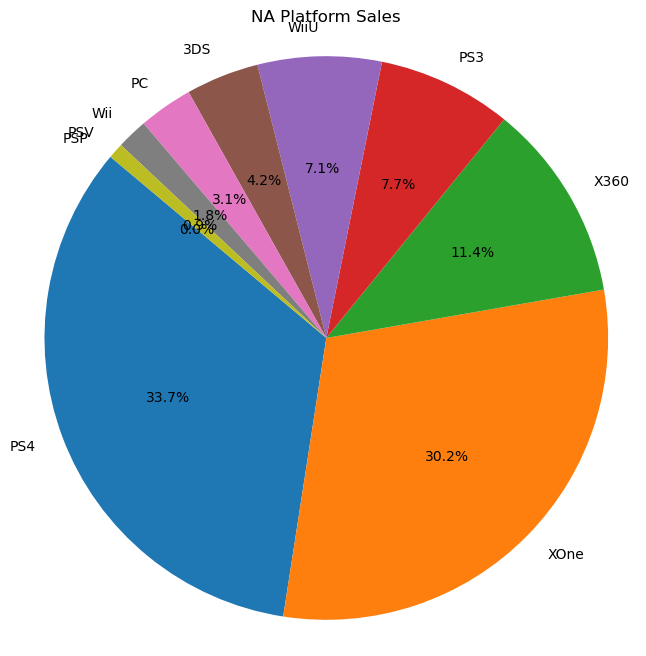

In [ ]:
# Extract labels and values for the pie chart
labels = platform_na_pop['platform']
sizes = platform_na_pop['na_sales']

# Create Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('NA Platform Sales')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()

In [ ]:
# EU platforms
platform_eu_pop = eu_data.groupby(['platform'])['eu_sales'].sum().sort_values(ascending=False).reset_index()

# Display EU data
print(platform_eu_pop)

  platform  eu_sales
0      PS4    101.73
1     XOne     38.24
2      PS3     20.24
3       PC     15.25
4     X360     13.67
5     WiiU     11.43
6      3DS      7.16
7      Wii      3.82
8      PSV      2.65
9      PSP      0.02


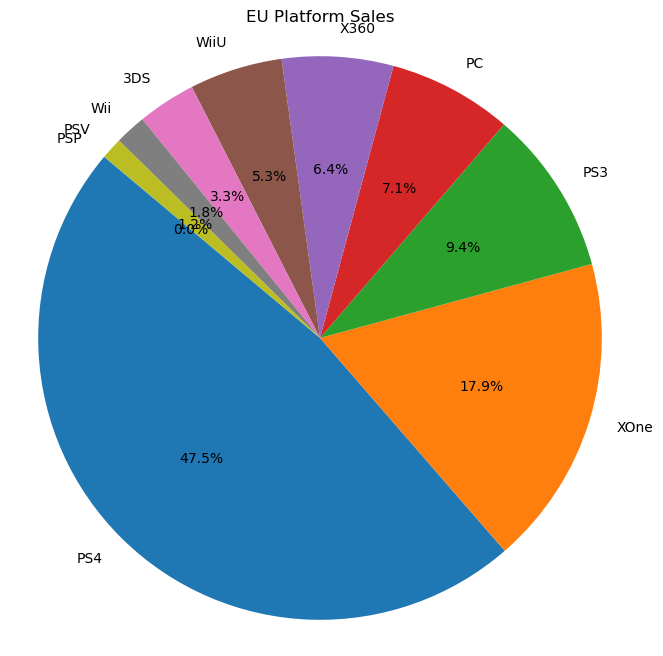

In [ ]:
# Extract labels and values for the pie chart
labels = platform_eu_pop['platform']
sizes = platform_eu_pop['eu_sales']

# Create Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('EU Platform Sales')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()

In [ ]:
# JP platforms
platform_jp_pop = jp_data.groupby(['platform'])['jp_sales'].sum().sort_values(ascending=False).reset_index()

# Display JP data
print(platform_jp_pop)

  platform  jp_sales
0      3DS     11.19
1      PS4      8.71
2     WiiU      5.78
3      PS3      5.63
4      PSV      5.24
5     XOne      0.27
6      PSP      0.14
7     X360      0.10
8       PC      0.00
9      Wii      0.00


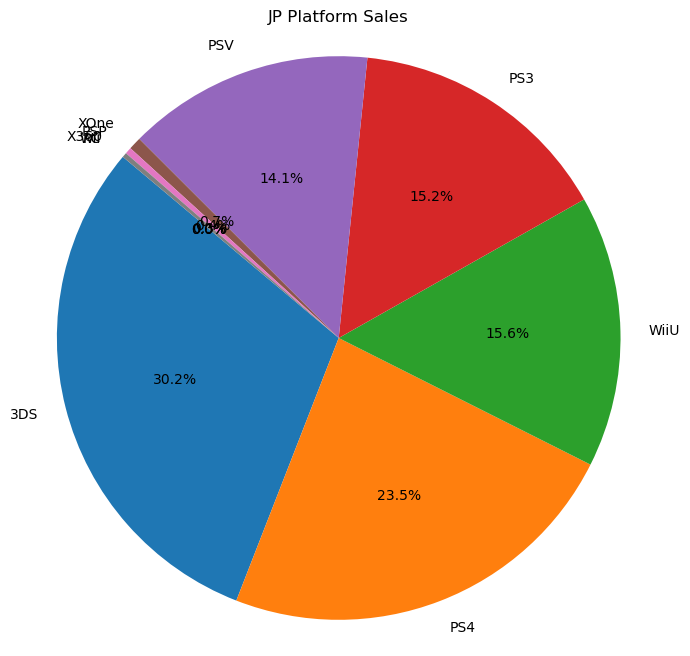

In [ ]:
# Extract labels and values for the pie chart
labels = platform_jp_pop['platform']
sizes = platform_jp_pop['jp_sales']

# Create Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('JP Platform Sales')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()

In [195]:
# Aggregate per-platform sales by region
platform_region_sales = DF_train.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()

# Option 1: pick the overall top 5 platforms by total (NA+EU+JP) sales
platform_region_sales['total_region_sales'] = (
    platform_region_sales['na_sales'] +
    platform_region_sales['eu_sales'] +
    platform_region_sales['jp_sales']
)

top5_platforms = platform_region_sales.nlargest(5, 'total_region_sales')

top5_platforms

,platform,na_sales,eu_sales,jp_sales,total_region_sales
3,PS4,97.68,128.49,14.69,240.86
9,XOne,81.18,46.12,0.32,127.62
0,3DS,22.64,16.12,44.40,83.16
2,PS3,22.76,26.25,11.72,60.73
8,X360,29.75,15.93,0.08,45.76


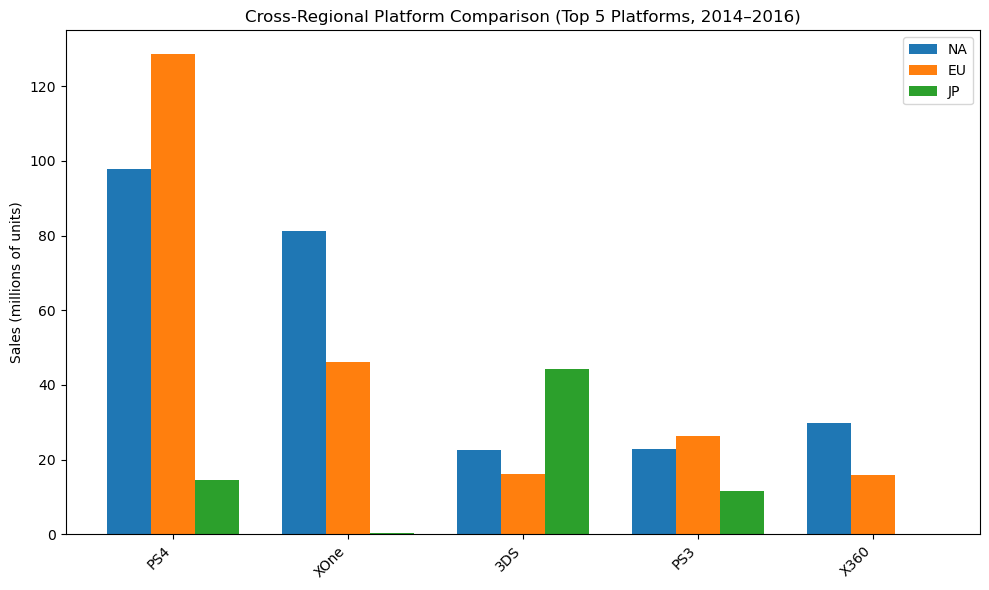

In [196]:
# Sort platforms for nicer plotting
top5_platforms = top5_platforms.sort_values('total_region_sales', ascending=False)

platforms = top5_platforms['platform'].tolist()
na_vals = top5_platforms['na_sales'].tolist()
eu_vals = top5_platforms['eu_sales'].tolist()
jp_vals = top5_platforms['jp_sales'].tolist()

x = np.arange(len(platforms))  # positions
width = 0.25

plt.figure(figsize=(10, 6))

plt.bar(x - width, na_vals, width, label='NA')
plt.bar(x,         eu_vals, width, label='EU')
plt.bar(x + width, jp_vals, width, label='JP')

plt.xticks(x, platforms, rotation=45, ha='right')
plt.ylabel("Sales (millions of units)")
plt.title("Cross-Regional Platform Comparison (Top 5 Platforms, 2014–2016)")
plt.legend()
plt.tight_layout()
plt.show()

To enable direct cross-regional comparison, I created a grouped bar chart of NA, EU, and JP sales for the top 5 platforms (by combined regional sales) in the 2014–2016 training window. For each platform, the plot shows three bars representing regional sales side by side, making it easy to see which platforms are stronger in specific regions (e.g., certain platforms performing better in Japan vs. North America). This visualization provides the combined cross-regional platform comparison requested in the template.

In [ ]:
# Examine the top 5 gaming genres for each region

# NA genres
genre_na_pop = na_data.groupby(['genre'])['na_sales'].sum().sort_values(ascending=False).reset_index()

# Display data
print(genre_na_pop.head(5))


          genre  na_sales
0       Shooter     59.60
1        Action     58.93
2        Sports     46.03
3  Role-Playing     19.38
4          Misc     12.33


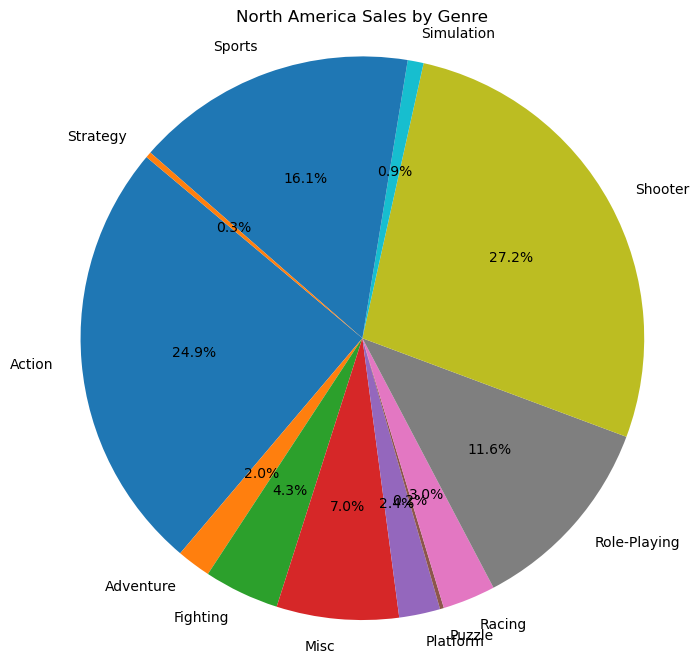

In [ ]:
# Prepare data for the pie chart
na_sales_data = DF_new_sorted.groupby('genre')['na_sales'].sum().reset_index()

# Extract labels and values for the pie chart
labels = na_sales_data['genre']
sizes = na_sales_data['na_sales']

# Create Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('North America Sales by Genre')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()

In [ ]:
# EU genre
genre_eu_pop = eu_data.groupby(['genre'])['eu_sales'].sum().sort_values(ascending=False).reset_index()

# Display data
print(genre_eu_pop.head(5))


          genre  eu_sales
0        Action     62.12
1       Shooter     48.65
2        Sports     45.91
3  Role-Playing     18.07
4        Racing     11.60


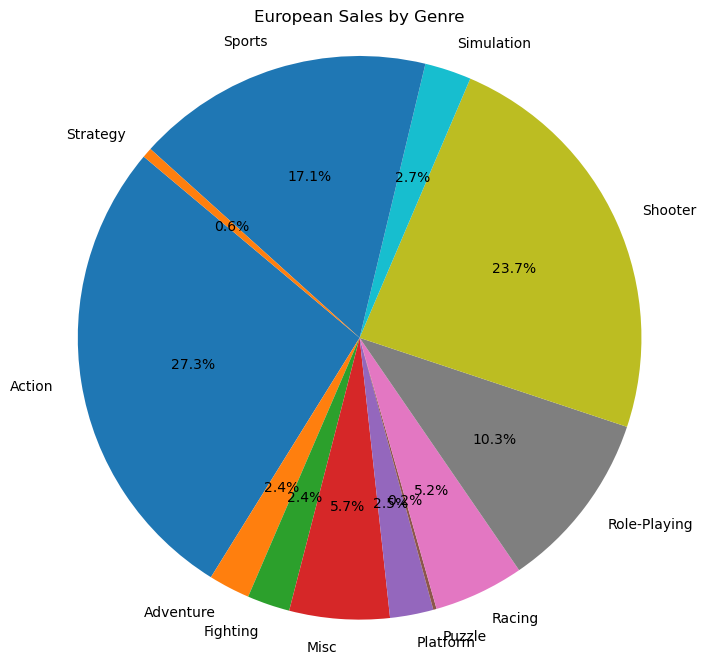

In [ ]:
# Prepare data for the pie chart
eu_sales_data = DF_new_sorted.groupby('genre')['eu_sales'].sum().reset_index()

# Extract labels and values for the pie chart
labels = eu_sales_data['genre']
sizes = eu_sales_data['eu_sales']

# Create Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('European Sales by Genre')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()

In [ ]:
# JP genre
genre_jp_pop = jp_data.groupby(['genre'])['jp_sales'].sum().sort_values(ascending=False).reset_index()

# Display data
print(genre_jp_pop.head(5))


          genre  jp_sales
0  Role-Playing     11.05
1        Action     10.38
2       Shooter      4.11
3      Platform      2.55
4    Simulation      1.89


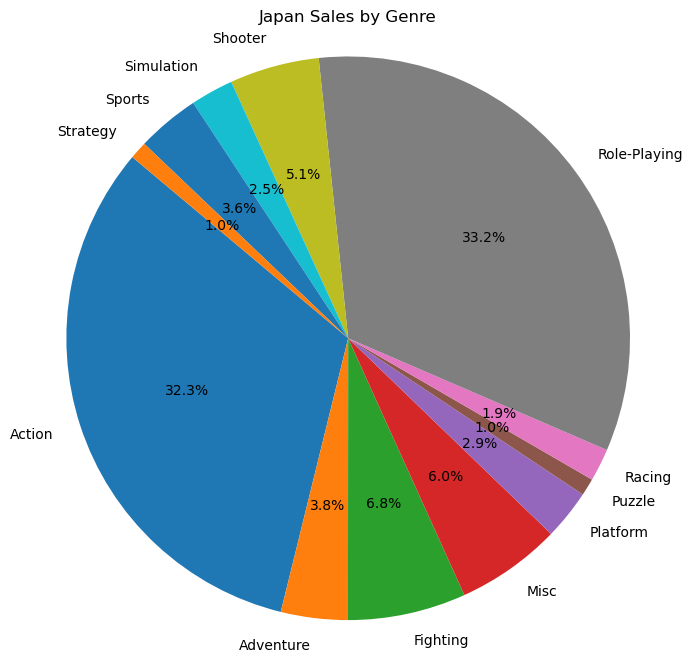

In [ ]:
# Prepare data for the pie chart
jp_sales_data = DF_new_sorted.groupby('genre')['jp_sales'].sum().reset_index()

# Extract labels and values for the pie chart
labels = jp_sales_data['genre']
sizes = jp_sales_data['jp_sales']

# Create Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Japan Sales by Genre')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()

All three regions had the genres Action, Shooter,and Role-Playing in their top 5.

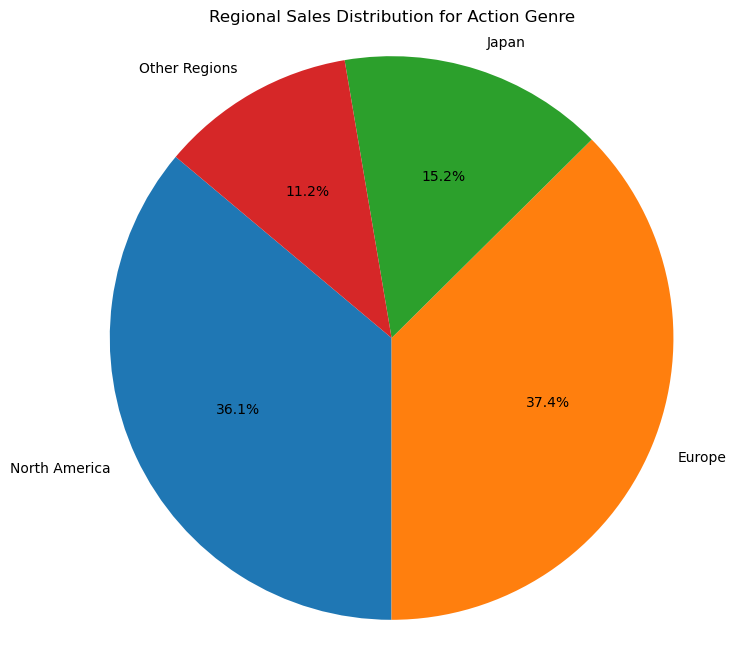

In [ ]:
# Visualization to display the portions of sales each region had for these top 5 genres

# Filter data for the specific genre
action_genre_data = DF_new_sorted[DF_new_sorted['genre'] == 'Action']

# Sum sales across regions for Action genre
na_action_sales = action_genre_data['na_sales'].sum()
eu_action_sales = action_genre_data['eu_sales'].sum()
jp_action_sales = action_genre_data['jp_sales'].sum()
other_action_sales = action_genre_data['other_sales'].sum()

# Prep data for pie chart
action_sales_data = [na_action_sales, eu_action_sales, jp_action_sales, other_action_sales]
regions = ['North America', 'Europe', 'Japan', 'Other Regions']

# Create Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(action_sales_data, labels=regions, autopct='%1.1f%%', startangle=140)
plt.title('Regional Sales Distribution for Action Genre')
plt.axis('equal')
plt.show()

The pie chart above shows NA ($58.93 USD Millions) and EU ($62.12 USD Millions) sales are the most significant for the popularity of games from the Action genre

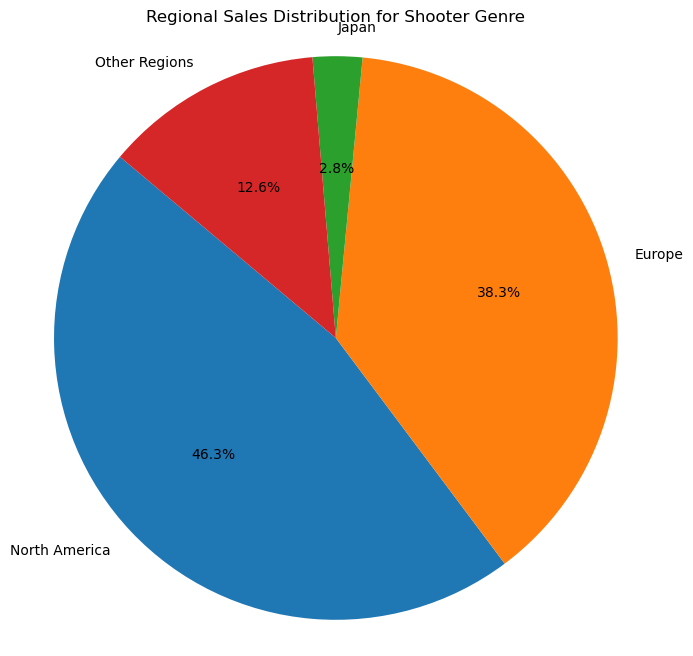

In [ ]:
# Filter data for the specific genre
shooter_genre_data = DF_new_sorted[DF_new_sorted['genre'] == 'Shooter']

# Sum sales across regions for Action genre
na_shooter_sales = shooter_genre_data['na_sales'].sum()
eu_shooter_sales = shooter_genre_data['eu_sales'].sum()
jp_shooter_sales = shooter_genre_data['jp_sales'].sum()
other_shooter_sales = shooter_genre_data['other_sales'].sum()

# Prep data for pie chart 
shooter_sales_data = [
    na_shooter_sales,
    eu_shooter_sales,
    jp_shooter_sales,
    other_shooter_sales
]
regions = ['North America', 'Europe', 'Japan', 'Other Regions']

# Create Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(shooter_sales_data, labels=regions, autopct='%1.1f%%', startangle=140)
plt.title('Regional Sales Distribution for Shooter Genre')
plt.axis('equal')
plt.show()

This pie chart shows NA ($59.60 USD Millions) and EU ($48.65 USD Millions) leading in sales for games that fall under the Shooter genre (this makes sense seeing the results for the Action genre games)

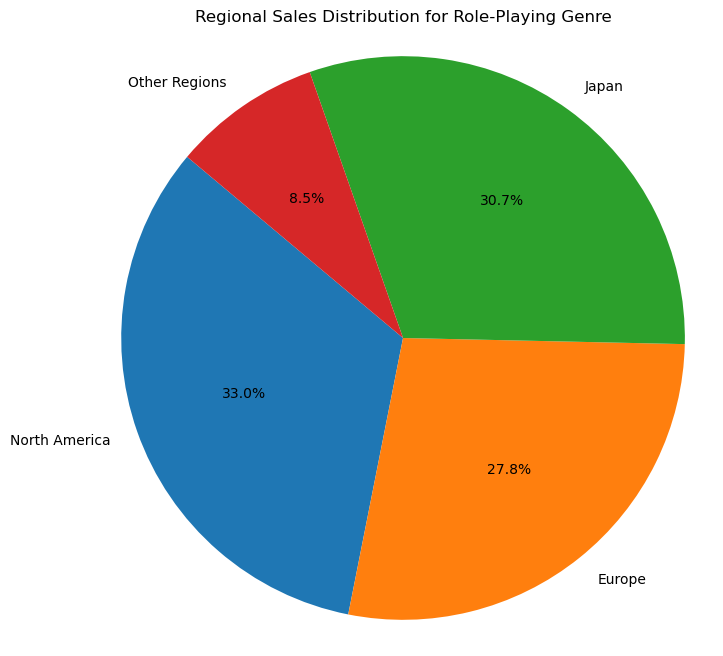

In [ ]:
# Filter data for the specific genre
role_play_genre_data = DF_new_sorted[DF_new_sorted['genre'] == 'Role-Playing']

# Sum sales across regions for Action genre
na_role_play_sales = role_play_genre_data['na_sales'].sum()
eu_role_play_sales = role_play_genre_data['eu_sales'].sum()
jp_role_play_sales = role_play_genre_data['jp_sales'].sum()
other_role_play_sales = role_play_genre_data['other_sales'].sum()

# Prep data for pie chart
role_play_sales_data = [na_role_play_sales, eu_role_play_sales, jp_role_play_sales, other_role_play_sales]
regions = ['North America', 'Europe', 'Japan', 'Other Regions']

# Create Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(role_play_sales_data, labels=regions, autopct='%1.1f%%', startangle=140)
plt.title('Regional Sales Distribution for Role-Playing Genre')
plt.axis('equal')
plt.show()

From the pie chart above, it is clear that NA ($19.38 USD Millions) and EU ($18.07 USD Millions) contribute the most significant amount of sales for games that fall under the Role-Playing Genre

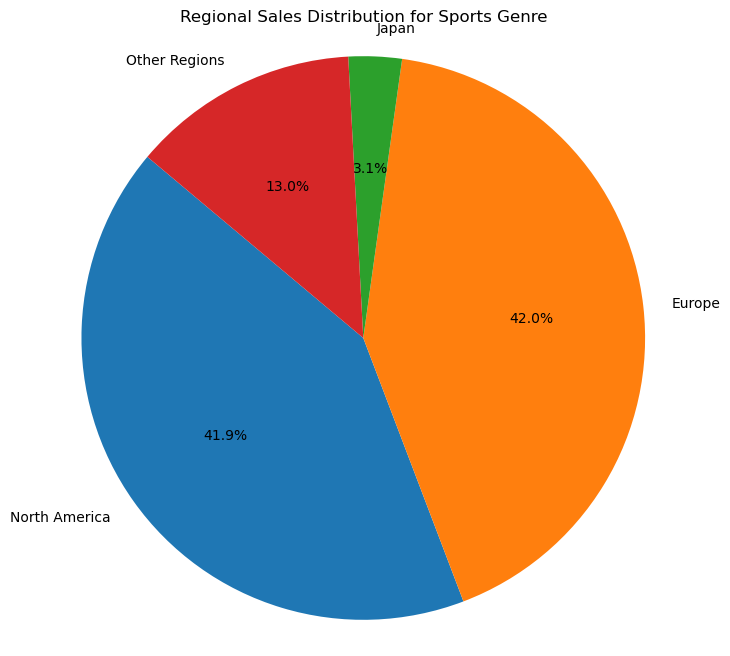

In [ ]:
# Only NA and EU showed the genre of Sports in their top 5 

# Filter data for the specific genre
sports_genre_data = DF_new_sorted[DF_new_sorted['genre'] == 'Sports']

# Sum sales across regions for Action genre
na_sports_sales = sports_genre_data['na_sales'].sum()
eu_sports_sales = sports_genre_data['eu_sales'].sum()
jp_sports_sales = sports_genre_data['jp_sales'].sum()
other_sports_sales = sports_genre_data['other_sales'].sum()

# Prep data for pie chart
sports_sales_data = [na_sports_sales, eu_sports_sales, jp_sports_sales, other_sports_sales]
regions = ['North America', 'Europe', 'Japan', 'Other Regions']

# Create Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(sports_sales_data, labels=regions, autopct='%1.1f%%', startangle=140)
plt.title('Regional Sales Distribution for Sports Genre')
plt.axis('equal')
plt.show()

From the pie chart above, it is clear that the NA ($46.03 USD Millions) and EU ($45.91 USD Millions) contribute the most to the total sales of games under the Sports genre.

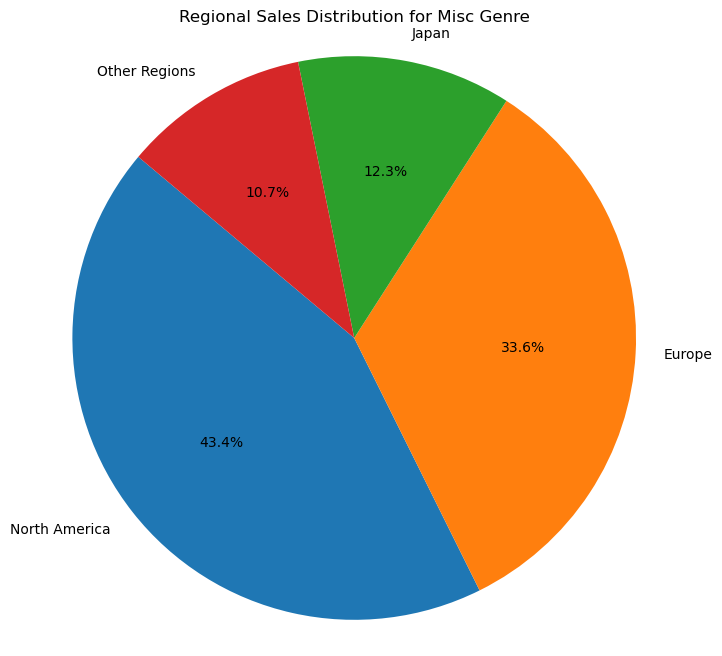

In [198]:
# Only NA showed the genre Misc in their top 5

# Filter data for the specific genre
misc_genre_data = DF_new_sorted[DF_new_sorted['genre'] == 'Misc']

# Sum sales across regions for Action genre
na_misc_sales = misc_genre_data['na_sales'].sum()
eu_misc_sales = misc_genre_data['eu_sales'].sum()
jp_misc_sales = misc_genre_data['jp_sales'].sum()
other_misc_sales = misc_genre_data['other_sales'].sum()

# Prep data for pie chart - USE MISC VALUES HERE
misc_sales_data = [na_misc_sales, eu_misc_sales, jp_misc_sales, other_misc_sales]
regions = ['North America', 'Europe', 'Japan', 'Other Regions']

# Create Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(misc_sales_data, labels=regions, autopct='%1.1f%%', startangle=140)
plt.title('Regional Sales Distribution for Misc Genre')
plt.axis('equal')
plt.show()

From the pie chart above, you can see that NA ($12.33 USD Millions) while it showed the genre Misc in its top 5 most popular, it was actually EU that contributed the most significant amount of sales for games falling under the Misc Genre.

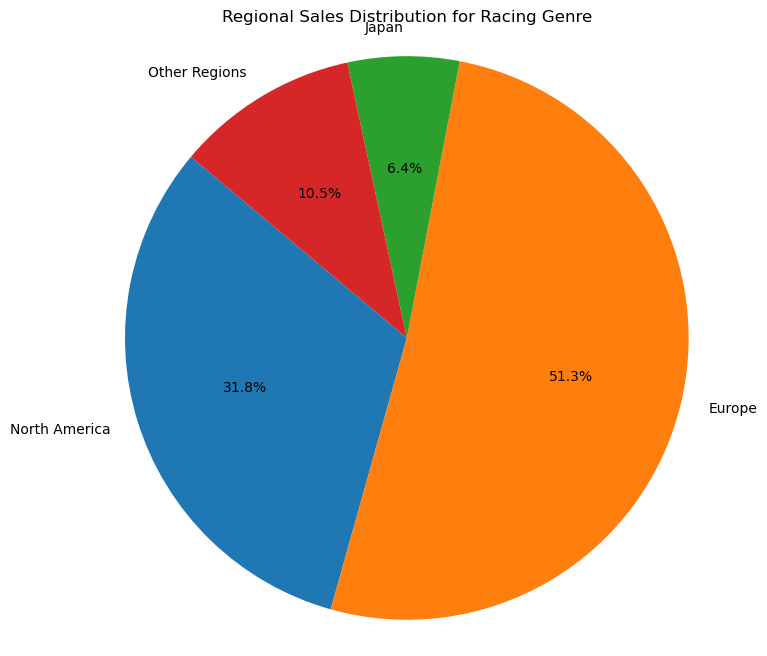

In [ ]:
# Only EU showed the genre Racing in their top 5

# Filter data for the specific genre
racing_genre_data = DF_new_sorted[DF_new_sorted['genre'] == 'Racing']

# Sum sales across regions for Action genre
na_racing_sales = racing_genre_data['na_sales'].sum()
eu_racing_sales = racing_genre_data['eu_sales'].sum()
jp_racing_sales = racing_genre_data['jp_sales'].sum()
other_racing_sales = racing_genre_data['other_sales'].sum()

# Prep data for pie chart
racing_sales_data = [na_racing_sales, eu_racing_sales, jp_racing_sales, other_racing_sales]
regions = ['North America', 'Europe', 'Japan', 'Other Regions']

# Create Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(racing_sales_data, labels=regions, autopct='%1.1f%%', startangle=140)
plt.title('Regional Sales Distribution for Racing Genre')
plt.axis('equal')
plt.show()

Racing was the most popular genre in the EU and they contributed the most sales to this genre of games with their sales at $11.60 USD Millions.

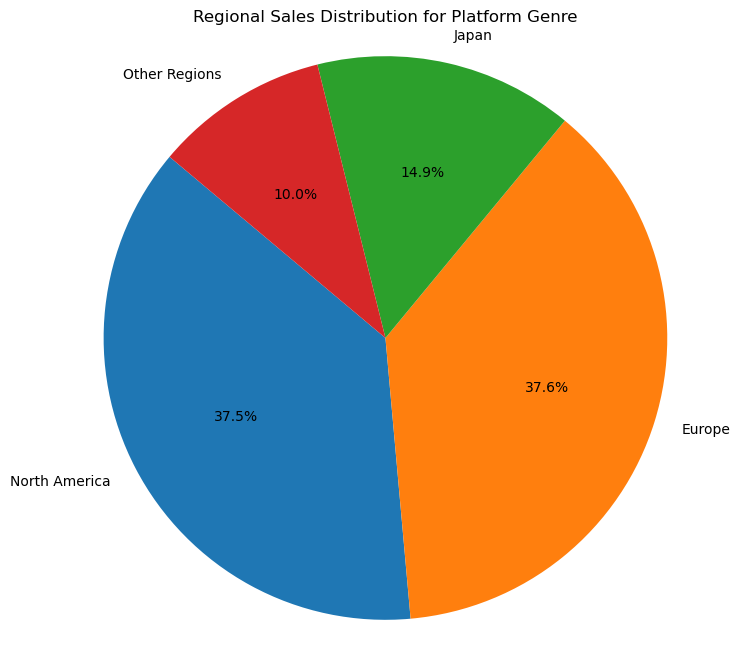

In [ ]:
# Only JP showed the genre Platform in their top 5

# Filter data for the specific genre
plat_genre_data = DF_new_sorted[DF_new_sorted['genre'] == 'Platform']

# Sum sales across regions for Action genre
na_plat_sales = plat_genre_data['na_sales'].sum()
eu_plat_sales = plat_genre_data['eu_sales'].sum()
jp_plat_sales = plat_genre_data['jp_sales'].sum()
other_plat_sales = plat_genre_data['other_sales'].sum()

# Prep data for pie chart
plat_sales_data = [na_plat_sales, eu_plat_sales, jp_plat_sales, other_plat_sales]
regions = ['North America', 'Europe', 'Japan', 'Other Regions']

# Create Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(plat_sales_data, labels=regions, autopct='%1.1f%%', startangle=140)
plt.title('Regional Sales Distribution for Platform Genre')
plt.axis('equal')
plt.show()

While Platform was the most popular genre of game in JP with sales at $2.55 USD Millions, it was actually NA and EU that contributed the most sales to this genre.

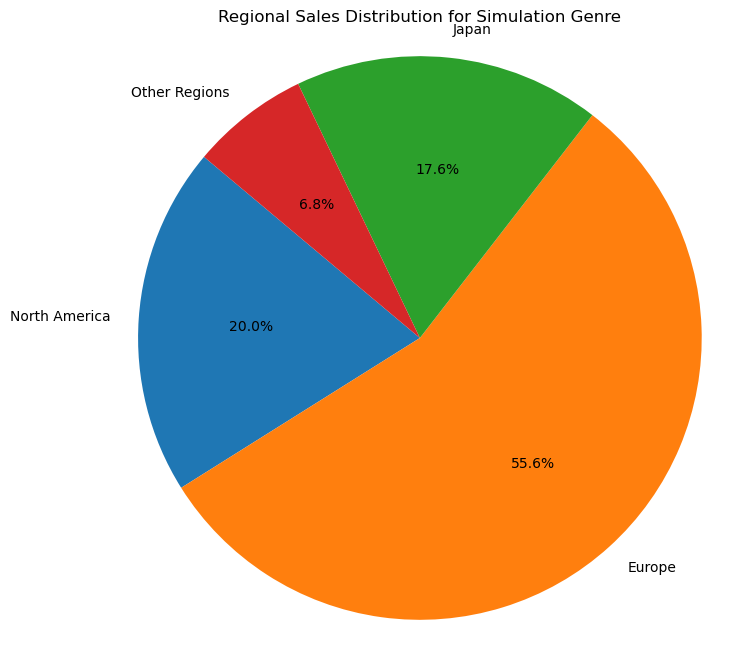

In [ ]:
# Only JP showed the genre Simulation in their top 5

# Filter data for the specific genre
sim_genre_data = DF_new_sorted[DF_new_sorted['genre'] == 'Simulation']

# Sum sales across regions for Action genre
na_sim_sales = sim_genre_data['na_sales'].sum()
eu_sim_sales = sim_genre_data['eu_sales'].sum()
jp_sim_sales = sim_genre_data['jp_sales'].sum()
other_sim_sales = sim_genre_data['other_sales'].sum()

# Prep data for pie chart
sim_sales_data = [na_sim_sales, eu_sim_sales, jp_sim_sales, other_sim_sales]
regions = ['North America', 'Europe', 'Japan', 'Other Regions']

# Create Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(sim_sales_data, labels=regions, autopct='%1.1f%%', startangle=140)
plt.title('Regional Sales Distribution for Simulation Genre')
plt.axis('equal')
plt.show()

While JP showed that the Simulation, with sales at $1.89 USD Millions, genre was one of their top five most popular genres, it was actually EU that contributed to most to this genre of game out of all the regions.

From all the data provided for the regional sales for genre specific games, it is clear that NA and EU are the highest contributers for the top 3 most popular genres. 

In [201]:
def rating_region_summary(df, region_col):
    """
    Compute ESRB rating performance summary for a given region.

    Parameters
    ----------
    df : pandas.DataFrame
        Game-level data (e.g., DF_train for 2014–2016).
    region_col : str
        Name of the regional sales column
        (e.g., 'na_sales', 'eu_sales', 'jp_sales').

    Returns
    -------
    pandas.DataFrame
        Summary table with total, mean, median, count, and market share
        of sales per ESRB rating for the specified region.
    """
    # Aggregate by ESRB rating
    rating_stats = df.groupby('rating')[region_col].agg(
        total_sales='sum',
        mean_sales='mean',
        median_sales='median',
        game_count='count'
    ).reset_index()

    # Market share within that region
    total_region_sales = rating_stats['total_sales'].sum()
    rating_stats['market_share'] = (
        rating_stats['total_sales'] / total_region_sales * 100
    )

    # Sort by total sales (or market share) descending
    rating_stats = rating_stats.sort_values('total_sales', ascending=False)

    return rating_stats

In [202]:
na_rating_profile = rating_region_summary(DF_train, 'na_sales')
eu_rating_profile = rating_region_summary(DF_train, 'eu_sales')
jp_rating_profile = rating_region_summary(DF_train, 'jp_sales')

print("NA rating profile:\n", na_rating_profile)
print("\nEU rating profile:\n", eu_rating_profile)
print("\nJP rating profile:\n", jp_rating_profile)

NA rating profile:
   rating  total_sales  mean_sales  median_sales  game_count  market_share
2      M        95.81    0.362917         0.115         264     43.126575
0      E        50.79    0.231918         0.050         219     22.861901
3      T        38.95    0.143727         0.030         271     17.532409
1   E10+        36.61    0.198967         0.110         184     16.479114

EU rating profile:
   rating  total_sales  mean_sales  median_sales  game_count  market_share
2      M        92.66    0.350985         0.115         264     43.398436
0      E        58.86    0.268767         0.050         219     27.567795
3      T        34.07    0.125720         0.040         271     15.957098
1   E10+        27.92    0.151739         0.095         184     13.076671

JP rating profile:
   rating  total_sales  mean_sales  median_sales  game_count  market_share
3      T        14.78    0.054539          0.01         271     40.163043
0      E         9.61    0.043881          0.00   

In [204]:
# Compute ESRB for all 3 regions
ratings_na_sales = (
    DF_train.groupby('rating')['na_sales']
    .sum()
    .reset_index()
    .rename(columns={'na_sales': 'NA'})
)

ratings_eu_sales = (
    DF_train.groupby('rating')['eu_sales']
    .sum()
    .reset_index()
    .rename(columns={'eu_sales': 'EU'})
)

ratings_jp_sales = (
    DF_train.groupby('rating')['jp_sales']
    .sum()
    .reset_index()
    .rename(columns={'jp_sales': 'JP'})
)


In [205]:
# Combine all three into one DataFrame on 'rating'
ratings_all = ratings_na_sales.merge(ratings_eu_sales, on='rating').merge(ratings_jp_sales, on='rating')

# Sort ratings by NA sales (optional)
ratings_all = ratings_all.sort_values('NA', ascending=False)

print(ratings_all)


  rating     NA     EU     JP
2      M  95.81  92.66   7.95
0      E  50.79  58.86   9.61
3      T  38.95  34.07  14.78
1   E10+  36.61  27.92   4.46


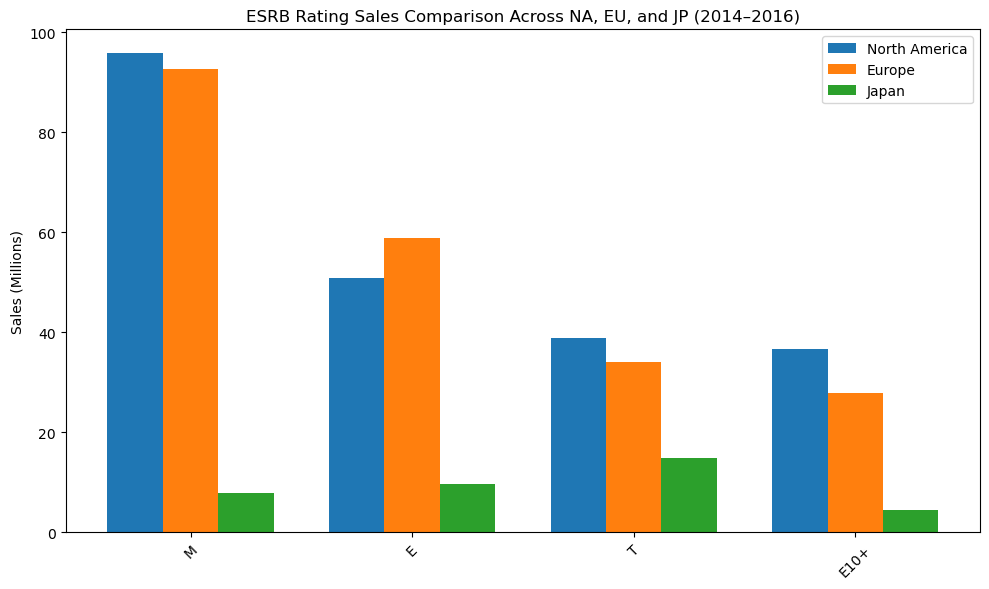

In [206]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

x = np.arange(len(ratings_all['rating']))   # rating positions
width = 0.25                                # width of each bar

plt.bar(x - width, ratings_all['NA'], width, label='North America')
plt.bar(x,         ratings_all['EU'], width, label='Europe')
plt.bar(x + width, ratings_all['JP'], width, label='Japan')

plt.xticks(x, ratings_all['rating'], rotation=45)
plt.ylabel("Sales (Millions)")
plt.title("ESRB Rating Sales Comparison Across NA, EU, and JP (2014–2016)")

plt.legend()
plt.tight_layout()
plt.show()


- M, E, and T are the most popular three game ratings for all three regions (NA, EU, JP). With M rated games being significantly more lucrative in NA and EU as opposed to JP.

- JP had higher sales for games rated E and T (games rated M were third popular for this region).

-These rating trends cincide with the most popular genre of games for each specific region.

        * NA & EU have their top two most popular genre as Action and Shooter which are commonly rated M for the level of violence. With Sports and Role-Playing as the next most popular which explaings the high sales for games with E ratings in NA & EU.

        * JP's top two genre of games are Role-Playing and Action. This explains why games rated E & T have higher sales than other ratings.

In [ ]:
# Test the hypothesis: The average user ratings on the XOne and PC platforms are the same. 

# Find the data for XOne and PC platform
xone_user_rating_data = DF_new_sorted[DF_new_sorted['platform'] == 'XOne']['user_score'].dropna()
pc_user_rating_data = DF_new_sorted[DF_new_sorted['platform'] == 'PC']['user_score'].dropna()

# Find the average user rating for XOne and PC platform
avg_xone_user_rating = xone_user_rating_data.mean()
avg_pc_user_rating = pc_user_rating_data.mean()

# Display data
print(f"The average user rating for XOne platform: {avg_xone_user_rating: .2f}")
print(f"The average user rating for PC platform: {avg_pc_user_rating: .2f}")


The average user rating for XOne platform:  6.60
The average user rating for PC platform:  6.28


In [ ]:
# Perform the independent t-test
t_stat, p_value = stats.ttest_ind(xone_user_rating_data, pc_user_rating_data)

# Set alpha threshold
alpha = 0.05

# Print the result
if p_value < alpha:
    print(f"The average user ratings for XOne and PC are significantly different (p = {p_value:.4f}).")
else:
    print(f"There is no significant difference in average user ratings for XOne and PC (p = {p_value:.4f}).")


There is no significant difference in average user ratings for XOne and PC (p = 0.0809).


The hypothesis test returns true, there is no significant difference in average user ratings for XOne and PC.

In [ ]:
# Test the following hypothesis: 
# Null Hypothesis: There is no difference in the average user scores for the Action and Sports genres. (This hypothesis was formulated with the assumption of no significant difference, meaning the average user ratings for Action and Sports games are equal. This is the starting assumption.)
# Alternative Hypothesis: The average user scores for the Action and Sports genres are different. (This hypothesis was formulated with the assumption of a significant difference, meaning the average user ratings for Action and Sports games are not equal. This is what we are aiming to support with evidence from the data.)
# Filter the data for Action and Sports genres
action_rating_data = DF_new_sorted[DF_new_sorted['genre'] == 'Action']['user_score']
sports_rating_data = DF_new_sorted[DF_new_sorted['genre'] == 'Sports']['user_score']

# Drop NaN values
action_rating_data = action_rating_data.dropna()
sports_rating_data = sports_rating_data.dropna()

# Calculate the average user scores for both genres
action_rating_data_avg = action_rating_data.mean()
sports_rating_data_avg = sports_rating_data.mean()

# Print the average user scores
print(f"Average user score for Action genre: {action_rating_data_avg:.2f}.")
print(f"Average user score for Sports genre: {sports_rating_data_avg:.2f}.")


Average user score for Action genre: 6.74.
Average user score for Sports genre: 5.23.


In [ ]:
# Perform the independent t-test again
t_stat, p_value = stats.ttest_ind(action_rating_data, sports_rating_data)

# Set alpha threshold
alpha = 0.05

# Print the result
if p_value < alpha:
    print(f"The average user scores for Action and Sports are significantly different (p = {p_value}).")
else:
    print(f"There is no significant difference in average user scores for Action and Sports (p = {p_value}).")


The average user scores for Action and Sports are significantly different (p = 6.220837026671051e-19).


In [ ]:
# The alternative hypothesis proves to be true. 

General conclusion:

Factors to consider when developing new games are as follows:

- Focus on creating games for platforms that have been in circulation for at least one year, but no longer than two to three years. The average lifespan of platforms is no longer than three years, after that time the possibility of a new system hiting the market significantly increases, and it only contiunes to do so as the years pass.

- With that being said, for the time period 2014-2017 the top five most popular platforms are as follows:
                1) PSP (showing shrinkage in sales of -0.23)
                2) 3DS (showing shrinkage in sales of -0.27)
                3) PS4 (showing shrinkage in sales of -0.39)
                4) XOne (showing shrinkage in sales of -0.47)
                5) PC (showing shrinkage in sales of -0.55)

- When gearing advertising campaigns to specific regions, focus on the following:
                1. North America (NA)
                    - Develop games compatable with PS4 (sales at $74.88 USD Million) and XOne ($67.16 USD Million).
                    - Develop games that fall into Shooter (sales at $59.60 USD Million), Action ($58.93 USD Million), and Sports ($46.03 USD Million).
                    - Do not shy away from games that could receive an ESRB rating of "M" (sales in the NA for games with this rating were $95.81 USD Million) while also not alientaing from consumers who play games given an "E" rating (sales for games with this rating were $50.84 USD Million) by the ESRB. These are the two ratings that showed most popular and lucrative in sales for this particular region.
                2. Europe (EU)
                    - Develop games compatable with PS4 (sales at $101.73 USD Million) and XOne ($38.24 USD Million).
                    - Develop games that fall into Action (sales at $62.12 USD Million), Shooter ($48.65 USD Million),and Sports ($45.91) genres.
                    - Do not shy away from games that could receive an ESRB rating of "M" (sales in the EU for games with this rating were $92.66 USD Million) while also not alientaing from consumers who play games given an "E" rating (sales for games with this rating were $59.34 USD Million) by the ESRB. These are the two ratings that showed most popular and lucrative in sales for this particular region.
                3. Japan (JP)
                    - Develop games compatable with the 3DS (sales at $11.19 USD Million) and PS4 ($8.71 USD Million).
                    - Develop games that fall into Role-Playing (sales at $11.05 USD Million), Action ($10.38 USD Million), and Shooter ($4.11 USD Million) genres.
                    - Focus on developing games that have an ESRB rating of "T" (sales in JP for games with this rating were $14.87 USD Million) and "E" (sales for games with this rating were $9.78 USD Million). Games with ratings of "M" do not sell as well in this particular market, do not waste time/energy on campaigning and advertising for those particular games.
    
   - If you are wanting to focus solely on one particular platform funnel efforts and resources into developing games for the PS4, this was the most popular platform for all regions.

   -If you are wanting to focus efforts and resources on specific genre of games, focus on games for Action and Shooter. These two genres were found to be popular in all regions.

   -If you are wanting to focus efforts and resources for specific ratings of games, focus on ratings of "M" & "E." These two ratings were found to be most successful in all regions (M rated games not so much in JP, but very successful sales for E rated games).
   
    - Another consideration for markets in different regions is where their economy stands. Are they stagnant? Are they in a recession or recovering from one? Are they showing continual economic growth? Try to allocate resources to advertise in regions showing continual economic growth.

    - While data showed user ratings had an impact on sales, it was not great enough to focus and rely on to determine future financial success of new games. The focus should be on acheiving high critic scores, data showed that higher critic scores led to higher sales.
